In [25]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm
import pandas as pd

In [26]:
iris = datasets.load_iris()
X = iris['data']
Y = np.array(pd.get_dummies(iris['target'])).astype(float)

### 2.2 implement: Classification problem solved by BPN

In [27]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def y_pred(Yj):
    temp = []
    for i in Yj:
        temp2 = []
        for j in i:
            if j >= 0.5:
                temp2.append(1)
            else:
                temp2.append(0)
        temp.append(temp2)
    return np.array(temp)

def acc(predict_error, Y):
    sum = 0
    for i in range(len(Y)):
        for j in range(len(Y[0])):
            if predict_error[i][j] == Y[i][j]:
                sum += 1
    return (sum / (Y.shape[0]*Y.shape[1])) * 100

class BPN_forecasting():
    def __init__(self,X = X, Y = Y, epochs = 100,learning_rate=0.1, hidden_nodes=2):
        self.X = X
        self.Y = Y
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.input_nodes = len(self.X[0])
        self.hidden_nodes = hidden_nodes
        self.output_nodes = 3
        
        np.random.seed(5) # fix the weights and bias
        self.W1 = np.random.uniform(-1,1,(self.hidden_nodes ,self.input_nodes))
        self.W2 = np.random.uniform(-1,1,(self.hidden_nodes, self.output_nodes))
        self.B1 = np.random.uniform(-1,1,(len(self.X),self.hidden_nodes))
        self.B2 = np.random.uniform(-1,1,(len(self.X),self.output_nodes))
        
    def train(self):
        result = []
        for i in tqdm(range(self.epochs)):
            Hh = sigmoid(self.X.dot(self.W1.T)- self.B1)
            Yj = sigmoid(Hh.dot(self.W2)- self.B2)
            Y_pred = y_pred(Yj)
            accuracy = acc(Y_pred, self.Y)
            result.append(accuracy)
            delta_j = Yj * (1-Yj) * (self.Y-Y_pred)
            self.W2 = self.W2 + (self.learning_rate * Hh.T.dot(delta_j))
            self.B2 = self.B2 + (-self.learning_rate * delta_j)
            delta_h = Hh * (1-Hh) * delta_j.dot(self.W2.T)
            self.W1 = self.W1 + (self.learning_rate * delta_h.T.dot(self.X))
            self.B1 = self.B1 + (-self.learning_rate * delta_h)
            print(f'epochs: {i}  | accuray: {accuracy:.3f} %')
        return result
    
    def plot(self, result):
        fig = plt.figure(figsize = (5,4))
        plt.plot(result)
        plt.title(f'nodes : {self.hidden_nodes}, learning rates: {self.learning_rate}')
        plt.ylabel('accuracy')
        plt.ylim(0,101)
        plt.xlabel('epochs')
        plt.show()
        fig.savefig(f'plotting\iris_{self.learning_rate}_{self.hidden_nodes}.png')

In [28]:
def BPN_implement(epoch, lr, hidden_nodes):
    BPN = BPN_forecasting(X,Y,epoch, lr, hidden_nodes)
    accuracy = BPN.train()
    BPN.plot(accuracy)

 16%|█▌        | 158/1000 [00:00<00:01, 723.20it/s]

epochs: 0  | accuray: 46.889 %
epochs: 1  | accuray: 47.333 %
epochs: 2  | accuray: 47.333 %
epochs: 3  | accuray: 47.778 %
epochs: 4  | accuray: 48.000 %
epochs: 5  | accuray: 48.000 %
epochs: 6  | accuray: 48.444 %
epochs: 7  | accuray: 48.667 %
epochs: 8  | accuray: 48.889 %
epochs: 9  | accuray: 49.333 %
epochs: 10  | accuray: 49.333 %
epochs: 11  | accuray: 49.333 %
epochs: 12  | accuray: 49.778 %
epochs: 13  | accuray: 49.778 %
epochs: 14  | accuray: 49.778 %
epochs: 15  | accuray: 49.778 %
epochs: 16  | accuray: 50.000 %
epochs: 17  | accuray: 50.000 %
epochs: 18  | accuray: 50.000 %
epochs: 19  | accuray: 50.000 %
epochs: 20  | accuray: 50.222 %
epochs: 21  | accuray: 50.444 %
epochs: 22  | accuray: 50.667 %
epochs: 23  | accuray: 50.889 %
epochs: 24  | accuray: 51.333 %
epochs: 25  | accuray: 51.556 %
epochs: 26  | accuray: 51.778 %
epochs: 27  | accuray: 51.778 %
epochs: 28  | accuray: 52.000 %
epochs: 29  | accuray: 52.222 %
epochs: 30  | accuray: 52.222 %
epochs: 31  | accu

 34%|███▍      | 340/1000 [00:00<00:00, 847.13it/s]

epochs: 158  | accuray: 70.444 %
epochs: 159  | accuray: 70.444 %
epochs: 160  | accuray: 70.444 %
epochs: 161  | accuray: 70.444 %
epochs: 162  | accuray: 70.889 %
epochs: 163  | accuray: 71.111 %
epochs: 164  | accuray: 71.111 %
epochs: 165  | accuray: 71.333 %
epochs: 166  | accuray: 71.556 %
epochs: 167  | accuray: 72.000 %
epochs: 168  | accuray: 72.000 %
epochs: 169  | accuray: 72.000 %
epochs: 170  | accuray: 72.222 %
epochs: 171  | accuray: 72.222 %
epochs: 172  | accuray: 72.000 %
epochs: 173  | accuray: 72.444 %
epochs: 174  | accuray: 72.444 %
epochs: 175  | accuray: 72.444 %
epochs: 176  | accuray: 72.444 %
epochs: 177  | accuray: 72.444 %
epochs: 178  | accuray: 72.444 %
epochs: 179  | accuray: 72.667 %
epochs: 180  | accuray: 72.889 %
epochs: 181  | accuray: 73.111 %
epochs: 182  | accuray: 73.111 %
epochs: 183  | accuray: 73.333 %
epochs: 184  | accuray: 73.556 %
epochs: 185  | accuray: 73.556 %
epochs: 186  | accuray: 73.556 %
epochs: 187  | accuray: 73.778 %
epochs: 18

 53%|█████▎    | 526/1000 [00:00<00:00, 895.47it/s]

epochs: 340  | accuray: 90.444 %
epochs: 341  | accuray: 90.667 %
epochs: 342  | accuray: 90.889 %
epochs: 343  | accuray: 91.111 %
epochs: 344  | accuray: 91.556 %
epochs: 345  | accuray: 91.556 %
epochs: 346  | accuray: 91.778 %
epochs: 347  | accuray: 92.000 %
epochs: 348  | accuray: 92.000 %
epochs: 349  | accuray: 92.000 %
epochs: 350  | accuray: 92.000 %
epochs: 351  | accuray: 92.000 %
epochs: 352  | accuray: 92.222 %
epochs: 353  | accuray: 92.222 %
epochs: 354  | accuray: 92.444 %
epochs: 355  | accuray: 92.444 %
epochs: 356  | accuray: 92.667 %
epochs: 357  | accuray: 92.667 %
epochs: 358  | accuray: 92.889 %
epochs: 359  | accuray: 93.333 %
epochs: 360  | accuray: 93.556 %
epochs: 361  | accuray: 93.556 %
epochs: 362  | accuray: 93.556 %
epochs: 363  | accuray: 93.556 %
epochs: 364  | accuray: 93.778 %
epochs: 365  | accuray: 94.000 %
epochs: 366  | accuray: 94.000 %
epochs: 367  | accuray: 94.000 %
epochs: 368  | accuray: 94.222 %
epochs: 369  | accuray: 94.222 %
epochs: 37

 62%|██████▏   | 616/1000 [00:00<00:00, 868.38it/s]

epochs: 526  | accuray: 100.000 %
epochs: 527  | accuray: 100.000 %
epochs: 528  | accuray: 100.000 %
epochs: 529  | accuray: 100.000 %
epochs: 530  | accuray: 100.000 %
epochs: 531  | accuray: 100.000 %
epochs: 532  | accuray: 100.000 %
epochs: 533  | accuray: 100.000 %
epochs: 534  | accuray: 100.000 %
epochs: 535  | accuray: 100.000 %
epochs: 536  | accuray: 100.000 %
epochs: 537  | accuray: 100.000 %
epochs: 538  | accuray: 100.000 %
epochs: 539  | accuray: 100.000 %
epochs: 540  | accuray: 100.000 %
epochs: 541  | accuray: 100.000 %
epochs: 542  | accuray: 100.000 %
epochs: 543  | accuray: 100.000 %
epochs: 544  | accuray: 100.000 %
epochs: 545  | accuray: 100.000 %
epochs: 546  | accuray: 100.000 %
epochs: 547  | accuray: 100.000 %
epochs: 548  | accuray: 100.000 %
epochs: 549  | accuray: 100.000 %
epochs: 550  | accuray: 100.000 %
epochs: 551  | accuray: 100.000 %
epochs: 552  | accuray: 100.000 %
epochs: 553  | accuray: 100.000 %
epochs: 554  | accuray: 100.000 %
epochs: 555  |

 81%|████████  | 808/1000 [00:00<00:00, 914.01it/s]

epochs: 708  | accuray: 100.000 %
epochs: 709  | accuray: 100.000 %
epochs: 710  | accuray: 100.000 %
epochs: 711  | accuray: 100.000 %
epochs: 712  | accuray: 100.000 %
epochs: 713  | accuray: 100.000 %
epochs: 714  | accuray: 100.000 %
epochs: 715  | accuray: 100.000 %
epochs: 716  | accuray: 100.000 %
epochs: 717  | accuray: 100.000 %
epochs: 718  | accuray: 100.000 %
epochs: 719  | accuray: 100.000 %
epochs: 720  | accuray: 100.000 %
epochs: 721  | accuray: 100.000 %
epochs: 722  | accuray: 100.000 %
epochs: 723  | accuray: 100.000 %
epochs: 724  | accuray: 100.000 %
epochs: 725  | accuray: 100.000 %
epochs: 726  | accuray: 100.000 %
epochs: 727  | accuray: 100.000 %
epochs: 728  | accuray: 100.000 %
epochs: 729  | accuray: 100.000 %
epochs: 730  | accuray: 100.000 %
epochs: 731  | accuray: 100.000 %
epochs: 732  | accuray: 100.000 %
epochs: 733  | accuray: 100.000 %
epochs: 734  | accuray: 100.000 %
epochs: 735  | accuray: 100.000 %
epochs: 736  | accuray: 100.000 %
epochs: 737  |

100%|██████████| 1000/1000 [00:01<00:00, 884.71it/s]

epochs: 902  | accuray: 100.000 %
epochs: 903  | accuray: 100.000 %
epochs: 904  | accuray: 100.000 %
epochs: 905  | accuray: 100.000 %
epochs: 906  | accuray: 100.000 %
epochs: 907  | accuray: 100.000 %
epochs: 908  | accuray: 100.000 %
epochs: 909  | accuray: 100.000 %
epochs: 910  | accuray: 100.000 %
epochs: 911  | accuray: 100.000 %
epochs: 912  | accuray: 100.000 %
epochs: 913  | accuray: 100.000 %
epochs: 914  | accuray: 100.000 %
epochs: 915  | accuray: 100.000 %
epochs: 916  | accuray: 100.000 %
epochs: 917  | accuray: 100.000 %
epochs: 918  | accuray: 100.000 %
epochs: 919  | accuray: 100.000 %
epochs: 920  | accuray: 100.000 %
epochs: 921  | accuray: 100.000 %
epochs: 922  | accuray: 100.000 %
epochs: 923  | accuray: 100.000 %
epochs: 924  | accuray: 100.000 %
epochs: 925  | accuray: 100.000 %
epochs: 926  | accuray: 100.000 %
epochs: 927  | accuray: 100.000 %
epochs: 928  | accuray: 100.000 %
epochs: 929  | accuray: 100.000 %
epochs: 930  | accuray: 100.000 %
epochs: 931  |

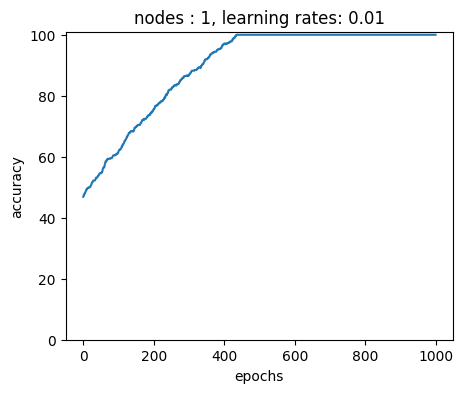

 22%|██▏       | 224/1000 [00:00<00:00, 1116.45it/s]

epochs: 0  | accuray: 54.000 %
epochs: 1  | accuray: 54.889 %
epochs: 2  | accuray: 55.333 %
epochs: 3  | accuray: 54.667 %
epochs: 4  | accuray: 55.333 %
epochs: 5  | accuray: 55.111 %
epochs: 6  | accuray: 55.333 %
epochs: 7  | accuray: 56.222 %
epochs: 8  | accuray: 57.333 %
epochs: 9  | accuray: 58.000 %
epochs: 10  | accuray: 59.111 %
epochs: 11  | accuray: 58.667 %
epochs: 12  | accuray: 59.333 %
epochs: 13  | accuray: 60.000 %
epochs: 14  | accuray: 59.778 %
epochs: 15  | accuray: 60.444 %
epochs: 16  | accuray: 60.667 %
epochs: 17  | accuray: 61.333 %
epochs: 18  | accuray: 61.556 %
epochs: 19  | accuray: 61.778 %
epochs: 20  | accuray: 61.778 %
epochs: 21  | accuray: 62.444 %
epochs: 22  | accuray: 62.889 %
epochs: 23  | accuray: 63.556 %
epochs: 24  | accuray: 63.556 %
epochs: 25  | accuray: 64.222 %
epochs: 26  | accuray: 64.667 %
epochs: 27  | accuray: 64.889 %
epochs: 28  | accuray: 65.111 %
epochs: 29  | accuray: 66.000 %
epochs: 30  | accuray: 66.889 %
epochs: 31  | accu

 45%|████▍     | 447/1000 [00:00<00:00, 1091.38it/s]

epochs: 224  | accuray: 92.889 %
epochs: 225  | accuray: 92.667 %
epochs: 226  | accuray: 89.556 %
epochs: 227  | accuray: 92.667 %
epochs: 228  | accuray: 92.889 %
epochs: 229  | accuray: 92.889 %
epochs: 230  | accuray: 93.111 %
epochs: 231  | accuray: 93.111 %
epochs: 232  | accuray: 92.889 %
epochs: 233  | accuray: 89.778 %
epochs: 234  | accuray: 92.667 %
epochs: 235  | accuray: 92.889 %
epochs: 236  | accuray: 93.111 %
epochs: 237  | accuray: 93.333 %
epochs: 238  | accuray: 93.333 %
epochs: 239  | accuray: 93.333 %
epochs: 240  | accuray: 92.444 %
epochs: 241  | accuray: 93.333 %
epochs: 242  | accuray: 93.333 %
epochs: 243  | accuray: 93.111 %
epochs: 244  | accuray: 93.556 %
epochs: 245  | accuray: 93.556 %
epochs: 246  | accuray: 92.667 %
epochs: 247  | accuray: 93.778 %
epochs: 248  | accuray: 93.778 %
epochs: 249  | accuray: 94.000 %
epochs: 250  | accuray: 93.778 %
epochs: 251  | accuray: 94.000 %
epochs: 252  | accuray: 94.000 %
epochs: 253  | accuray: 93.556 %
epochs: 25

 67%|██████▋   | 666/1000 [00:00<00:00, 1066.74it/s]

epochs: 447  | accuray: 99.778 %
epochs: 448  | accuray: 99.778 %
epochs: 449  | accuray: 99.778 %
epochs: 450  | accuray: 99.778 %
epochs: 451  | accuray: 98.889 %
epochs: 452  | accuray: 99.778 %
epochs: 453  | accuray: 99.778 %
epochs: 454  | accuray: 99.778 %
epochs: 455  | accuray: 99.778 %
epochs: 456  | accuray: 100.000 %
epochs: 457  | accuray: 100.000 %
epochs: 458  | accuray: 100.000 %
epochs: 459  | accuray: 100.000 %
epochs: 460  | accuray: 100.000 %
epochs: 461  | accuray: 100.000 %
epochs: 462  | accuray: 100.000 %
epochs: 463  | accuray: 100.000 %
epochs: 464  | accuray: 100.000 %
epochs: 465  | accuray: 100.000 %
epochs: 466  | accuray: 100.000 %
epochs: 467  | accuray: 100.000 %
epochs: 468  | accuray: 100.000 %
epochs: 469  | accuray: 100.000 %
epochs: 470  | accuray: 100.000 %
epochs: 471  | accuray: 100.000 %
epochs: 472  | accuray: 100.000 %
epochs: 473  | accuray: 100.000 %
epochs: 474  | accuray: 100.000 %
epochs: 475  | accuray: 100.000 %
epochs: 476  | accuray:

 88%|████████▊ | 884/1000 [00:00<00:00, 1078.66it/s]

epochs: 666  | accuray: 100.000 %
epochs: 667  | accuray: 100.000 %
epochs: 668  | accuray: 100.000 %
epochs: 669  | accuray: 100.000 %
epochs: 670  | accuray: 100.000 %
epochs: 671  | accuray: 100.000 %
epochs: 672  | accuray: 100.000 %
epochs: 673  | accuray: 100.000 %
epochs: 674  | accuray: 100.000 %
epochs: 675  | accuray: 100.000 %
epochs: 676  | accuray: 100.000 %
epochs: 677  | accuray: 100.000 %
epochs: 678  | accuray: 100.000 %
epochs: 679  | accuray: 100.000 %
epochs: 680  | accuray: 100.000 %
epochs: 681  | accuray: 100.000 %
epochs: 682  | accuray: 100.000 %
epochs: 683  | accuray: 100.000 %
epochs: 684  | accuray: 100.000 %
epochs: 685  | accuray: 100.000 %
epochs: 686  | accuray: 100.000 %
epochs: 687  | accuray: 100.000 %
epochs: 688  | accuray: 100.000 %
epochs: 689  | accuray: 100.000 %
epochs: 690  | accuray: 100.000 %
epochs: 691  | accuray: 100.000 %
epochs: 692  | accuray: 100.000 %
epochs: 693  | accuray: 100.000 %
epochs: 694  | accuray: 100.000 %
epochs: 695  |

100%|██████████| 1000/1000 [00:00<00:00, 1077.10it/s]

epochs: 884  | accuray: 100.000 %
epochs: 885  | accuray: 100.000 %
epochs: 886  | accuray: 100.000 %
epochs: 887  | accuray: 100.000 %
epochs: 888  | accuray: 100.000 %
epochs: 889  | accuray: 100.000 %
epochs: 890  | accuray: 100.000 %
epochs: 891  | accuray: 100.000 %
epochs: 892  | accuray: 100.000 %
epochs: 893  | accuray: 100.000 %
epochs: 894  | accuray: 100.000 %
epochs: 895  | accuray: 100.000 %
epochs: 896  | accuray: 100.000 %
epochs: 897  | accuray: 100.000 %
epochs: 898  | accuray: 100.000 %
epochs: 899  | accuray: 100.000 %
epochs: 900  | accuray: 100.000 %
epochs: 901  | accuray: 100.000 %
epochs: 902  | accuray: 100.000 %
epochs: 903  | accuray: 100.000 %
epochs: 904  | accuray: 100.000 %
epochs: 905  | accuray: 100.000 %
epochs: 906  | accuray: 100.000 %
epochs: 907  | accuray: 100.000 %
epochs: 908  | accuray: 100.000 %
epochs: 909  | accuray: 100.000 %
epochs: 910  | accuray: 100.000 %
epochs: 911  | accuray: 100.000 %
epochs: 912  | accuray: 100.000 %
epochs: 913  |

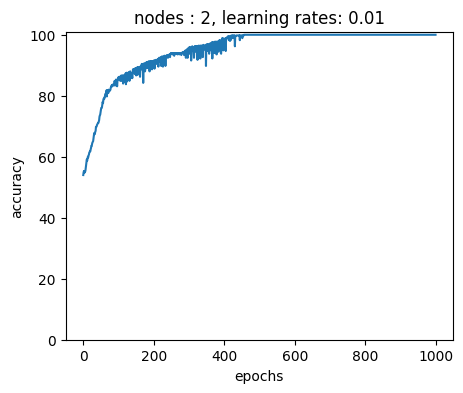

 20%|██        | 202/1000 [00:00<00:00, 955.02it/s] 

epochs: 0  | accuray: 57.111 %
epochs: 1  | accuray: 57.556 %
epochs: 2  | accuray: 57.556 %
epochs: 3  | accuray: 58.667 %
epochs: 4  | accuray: 58.889 %
epochs: 5  | accuray: 58.667 %
epochs: 6  | accuray: 58.889 %
epochs: 7  | accuray: 58.889 %
epochs: 8  | accuray: 59.333 %
epochs: 9  | accuray: 59.333 %
epochs: 10  | accuray: 59.778 %
epochs: 11  | accuray: 60.222 %
epochs: 12  | accuray: 60.222 %
epochs: 13  | accuray: 60.444 %
epochs: 14  | accuray: 60.444 %
epochs: 15  | accuray: 60.222 %
epochs: 16  | accuray: 60.444 %
epochs: 17  | accuray: 60.222 %
epochs: 18  | accuray: 60.444 %
epochs: 19  | accuray: 60.444 %
epochs: 20  | accuray: 60.889 %
epochs: 21  | accuray: 60.444 %
epochs: 22  | accuray: 61.333 %
epochs: 23  | accuray: 60.667 %
epochs: 24  | accuray: 62.000 %
epochs: 25  | accuray: 61.111 %
epochs: 26  | accuray: 62.000 %
epochs: 27  | accuray: 61.556 %
epochs: 28  | accuray: 61.778 %
epochs: 29  | accuray: 61.333 %
epochs: 30  | accuray: 61.778 %
epochs: 31  | accu

 40%|████      | 400/1000 [00:00<00:00, 974.56it/s]

epochs: 202  | accuray: 91.111 %
epochs: 203  | accuray: 89.111 %
epochs: 204  | accuray: 91.333 %
epochs: 205  | accuray: 91.556 %
epochs: 206  | accuray: 87.778 %
epochs: 207  | accuray: 91.333 %
epochs: 208  | accuray: 91.333 %
epochs: 209  | accuray: 90.444 %
epochs: 210  | accuray: 91.778 %
epochs: 211  | accuray: 88.222 %
epochs: 212  | accuray: 91.111 %
epochs: 213  | accuray: 91.556 %
epochs: 214  | accuray: 91.556 %
epochs: 215  | accuray: 88.667 %
epochs: 216  | accuray: 91.556 %
epochs: 217  | accuray: 92.000 %
epochs: 218  | accuray: 92.000 %
epochs: 219  | accuray: 90.667 %
epochs: 220  | accuray: 92.444 %
epochs: 221  | accuray: 92.444 %
epochs: 222  | accuray: 89.111 %
epochs: 223  | accuray: 91.556 %
epochs: 224  | accuray: 92.000 %
epochs: 225  | accuray: 92.889 %
epochs: 226  | accuray: 92.667 %
epochs: 227  | accuray: 89.333 %
epochs: 228  | accuray: 92.222 %
epochs: 229  | accuray: 92.889 %
epochs: 230  | accuray: 92.444 %
epochs: 231  | accuray: 92.222 %
epochs: 23

 61%|██████    | 607/1000 [00:00<00:00, 1009.63it/s]

epochs: 400  | accuray: 98.889 %
epochs: 401  | accuray: 97.111 %
epochs: 402  | accuray: 98.444 %
epochs: 403  | accuray: 98.889 %
epochs: 404  | accuray: 97.333 %
epochs: 405  | accuray: 98.889 %
epochs: 406  | accuray: 98.889 %
epochs: 407  | accuray: 94.889 %
epochs: 408  | accuray: 98.444 %
epochs: 409  | accuray: 98.889 %
epochs: 410  | accuray: 98.889 %
epochs: 411  | accuray: 98.889 %
epochs: 412  | accuray: 93.333 %
epochs: 413  | accuray: 97.778 %
epochs: 414  | accuray: 98.667 %
epochs: 415  | accuray: 96.222 %
epochs: 416  | accuray: 98.667 %
epochs: 417  | accuray: 99.111 %
epochs: 418  | accuray: 98.889 %
epochs: 419  | accuray: 98.444 %
epochs: 420  | accuray: 97.556 %
epochs: 421  | accuray: 99.333 %
epochs: 422  | accuray: 99.111 %
epochs: 423  | accuray: 95.333 %
epochs: 424  | accuray: 98.444 %
epochs: 425  | accuray: 99.111 %
epochs: 426  | accuray: 94.444 %
epochs: 427  | accuray: 98.667 %
epochs: 428  | accuray: 98.889 %
epochs: 429  | accuray: 99.333 %
epochs: 43

 82%|████████▏ | 820/1000 [00:00<00:00, 1035.13it/s]

epochs: 607  | accuray: 100.000 %
epochs: 608  | accuray: 100.000 %
epochs: 609  | accuray: 100.000 %
epochs: 610  | accuray: 100.000 %
epochs: 611  | accuray: 100.000 %
epochs: 612  | accuray: 100.000 %
epochs: 613  | accuray: 100.000 %
epochs: 614  | accuray: 100.000 %
epochs: 615  | accuray: 100.000 %
epochs: 616  | accuray: 100.000 %
epochs: 617  | accuray: 100.000 %
epochs: 618  | accuray: 100.000 %
epochs: 619  | accuray: 100.000 %
epochs: 620  | accuray: 100.000 %
epochs: 621  | accuray: 100.000 %
epochs: 622  | accuray: 100.000 %
epochs: 623  | accuray: 100.000 %
epochs: 624  | accuray: 100.000 %
epochs: 625  | accuray: 100.000 %
epochs: 626  | accuray: 100.000 %
epochs: 627  | accuray: 100.000 %
epochs: 628  | accuray: 100.000 %
epochs: 629  | accuray: 100.000 %
epochs: 630  | accuray: 100.000 %
epochs: 631  | accuray: 100.000 %
epochs: 632  | accuray: 100.000 %
epochs: 633  | accuray: 100.000 %
epochs: 634  | accuray: 100.000 %
epochs: 635  | accuray: 100.000 %
epochs: 636  |

100%|██████████| 1000/1000 [00:00<00:00, 1005.55it/s]

epochs: 820  | accuray: 100.000 %
epochs: 821  | accuray: 100.000 %
epochs: 822  | accuray: 100.000 %
epochs: 823  | accuray: 100.000 %
epochs: 824  | accuray: 100.000 %
epochs: 825  | accuray: 100.000 %
epochs: 826  | accuray: 100.000 %
epochs: 827  | accuray: 100.000 %
epochs: 828  | accuray: 100.000 %
epochs: 829  | accuray: 100.000 %
epochs: 830  | accuray: 100.000 %
epochs: 831  | accuray: 100.000 %
epochs: 832  | accuray: 100.000 %
epochs: 833  | accuray: 100.000 %
epochs: 834  | accuray: 100.000 %
epochs: 835  | accuray: 100.000 %
epochs: 836  | accuray: 100.000 %
epochs: 837  | accuray: 100.000 %
epochs: 838  | accuray: 100.000 %
epochs: 839  | accuray: 100.000 %
epochs: 840  | accuray: 100.000 %
epochs: 841  | accuray: 100.000 %
epochs: 842  | accuray: 100.000 %
epochs: 843  | accuray: 100.000 %
epochs: 844  | accuray: 100.000 %
epochs: 845  | accuray: 100.000 %
epochs: 846  | accuray: 100.000 %
epochs: 847  | accuray: 100.000 %
epochs: 848  | accuray: 100.000 %
epochs: 849  |

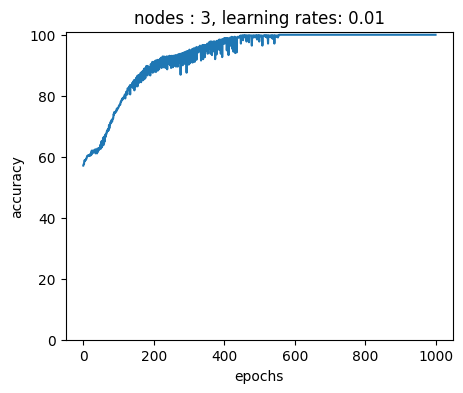

 10%|█         | 102/1000 [00:00<00:00, 1014.21it/s]

epochs: 0  | accuray: 57.556 %
epochs: 1  | accuray: 58.000 %
epochs: 2  | accuray: 59.556 %
epochs: 3  | accuray: 60.222 %
epochs: 4  | accuray: 60.889 %
epochs: 5  | accuray: 61.778 %
epochs: 6  | accuray: 63.111 %
epochs: 7  | accuray: 64.222 %
epochs: 8  | accuray: 64.889 %
epochs: 9  | accuray: 65.556 %
epochs: 10  | accuray: 65.556 %
epochs: 11  | accuray: 68.222 %
epochs: 12  | accuray: 65.556 %
epochs: 13  | accuray: 69.111 %
epochs: 14  | accuray: 66.222 %
epochs: 15  | accuray: 69.111 %
epochs: 16  | accuray: 67.778 %
epochs: 17  | accuray: 68.222 %
epochs: 18  | accuray: 68.444 %
epochs: 19  | accuray: 69.111 %
epochs: 20  | accuray: 70.000 %
epochs: 21  | accuray: 69.778 %
epochs: 22  | accuray: 71.556 %
epochs: 23  | accuray: 70.444 %
epochs: 24  | accuray: 72.222 %
epochs: 25  | accuray: 72.222 %
epochs: 26  | accuray: 73.111 %
epochs: 27  | accuray: 72.667 %
epochs: 28  | accuray: 74.222 %
epochs: 29  | accuray: 74.000 %
epochs: 30  | accuray: 73.778 %
epochs: 31  | accu

 41%|████      | 411/1000 [00:00<00:00, 1000.87it/s]

epochs: 202  | accuray: 91.778 %
epochs: 203  | accuray: 93.333 %
epochs: 204  | accuray: 90.222 %
epochs: 205  | accuray: 92.444 %
epochs: 206  | accuray: 90.222 %
epochs: 207  | accuray: 89.333 %
epochs: 208  | accuray: 87.778 %
epochs: 209  | accuray: 86.000 %
epochs: 210  | accuray: 89.556 %
epochs: 211  | accuray: 91.333 %
epochs: 212  | accuray: 90.889 %
epochs: 213  | accuray: 90.222 %
epochs: 214  | accuray: 91.111 %
epochs: 215  | accuray: 91.333 %
epochs: 216  | accuray: 92.222 %
epochs: 217  | accuray: 92.444 %
epochs: 218  | accuray: 92.444 %
epochs: 219  | accuray: 92.444 %
epochs: 220  | accuray: 94.000 %
epochs: 221  | accuray: 92.889 %
epochs: 222  | accuray: 93.111 %
epochs: 223  | accuray: 93.778 %
epochs: 224  | accuray: 94.444 %
epochs: 225  | accuray: 94.000 %
epochs: 226  | accuray: 94.000 %
epochs: 227  | accuray: 95.111 %
epochs: 228  | accuray: 94.444 %
epochs: 229  | accuray: 94.667 %
epochs: 230  | accuray: 94.222 %
epochs: 231  | accuray: 93.778 %
epochs: 23

 51%|█████▏    | 514/1000 [00:00<00:00, 1009.34it/s]

epochs: 411  | accuray: 99.778 %
epochs: 412  | accuray: 99.778 %
epochs: 413  | accuray: 99.333 %
epochs: 414  | accuray: 99.778 %
epochs: 415  | accuray: 99.778 %
epochs: 416  | accuray: 99.111 %
epochs: 417  | accuray: 99.778 %
epochs: 418  | accuray: 99.778 %
epochs: 419  | accuray: 99.778 %
epochs: 420  | accuray: 100.000 %
epochs: 421  | accuray: 100.000 %
epochs: 422  | accuray: 100.000 %
epochs: 423  | accuray: 100.000 %
epochs: 424  | accuray: 100.000 %
epochs: 425  | accuray: 100.000 %
epochs: 426  | accuray: 100.000 %
epochs: 427  | accuray: 100.000 %
epochs: 428  | accuray: 100.000 %
epochs: 429  | accuray: 100.000 %
epochs: 430  | accuray: 100.000 %
epochs: 431  | accuray: 100.000 %
epochs: 432  | accuray: 100.000 %
epochs: 433  | accuray: 100.000 %
epochs: 434  | accuray: 100.000 %
epochs: 435  | accuray: 100.000 %
epochs: 436  | accuray: 100.000 %
epochs: 437  | accuray: 100.000 %
epochs: 438  | accuray: 100.000 %
epochs: 439  | accuray: 100.000 %
epochs: 440  | accuray:

 71%|███████   | 709/1000 [00:00<00:00, 813.36it/s] 

epochs: 593  | accuray: 100.000 %
epochs: 594  | accuray: 100.000 %
epochs: 595  | accuray: 100.000 %
epochs: 596  | accuray: 100.000 %
epochs: 597  | accuray: 100.000 %
epochs: 598  | accuray: 100.000 %
epochs: 599  | accuray: 100.000 %
epochs: 600  | accuray: 100.000 %
epochs: 601  | accuray: 100.000 %
epochs: 602  | accuray: 100.000 %
epochs: 603  | accuray: 100.000 %
epochs: 604  | accuray: 100.000 %
epochs: 605  | accuray: 100.000 %
epochs: 606  | accuray: 100.000 %
epochs: 607  | accuray: 100.000 %
epochs: 608  | accuray: 100.000 %
epochs: 609  | accuray: 100.000 %
epochs: 610  | accuray: 100.000 %
epochs: 611  | accuray: 100.000 %
epochs: 612  | accuray: 100.000 %
epochs: 613  | accuray: 100.000 %
epochs: 614  | accuray: 100.000 %
epochs: 615  | accuray: 100.000 %
epochs: 616  | accuray: 100.000 %
epochs: 617  | accuray: 100.000 %
epochs: 618  | accuray: 100.000 %
epochs: 619  | accuray: 100.000 %
epochs: 620  | accuray: 100.000 %
epochs: 621  | accuray: 100.000 %
epochs: 622  |

 79%|███████▉  | 793/1000 [00:00<00:00, 806.81it/s]

epochs: 710  | accuray: 100.000 %
epochs: 711  | accuray: 100.000 %
epochs: 712  | accuray: 100.000 %
epochs: 713  | accuray: 100.000 %
epochs: 714  | accuray: 100.000 %
epochs: 715  | accuray: 100.000 %
epochs: 716  | accuray: 100.000 %
epochs: 717  | accuray: 100.000 %
epochs: 718  | accuray: 100.000 %
epochs: 719  | accuray: 100.000 %
epochs: 720  | accuray: 100.000 %
epochs: 721  | accuray: 100.000 %
epochs: 722  | accuray: 100.000 %
epochs: 723  | accuray: 100.000 %
epochs: 724  | accuray: 100.000 %
epochs: 725  | accuray: 100.000 %
epochs: 726  | accuray: 100.000 %
epochs: 727  | accuray: 100.000 %
epochs: 728  | accuray: 100.000 %
epochs: 729  | accuray: 100.000 %
epochs: 730  | accuray: 100.000 %
epochs: 731  | accuray: 100.000 %
epochs: 732  | accuray: 100.000 %
epochs: 733  | accuray: 100.000 %
epochs: 734  | accuray: 100.000 %
epochs: 735  | accuray: 100.000 %
epochs: 736  | accuray: 100.000 %
epochs: 737  | accuray: 100.000 %
epochs: 738  | accuray: 100.000 %
epochs: 739  |

100%|██████████| 1000/1000 [00:01<00:00, 898.93it/s]

epochs: 887  | accuray: 100.000 %
epochs: 888  | accuray: 100.000 %
epochs: 889  | accuray: 100.000 %
epochs: 890  | accuray: 100.000 %
epochs: 891  | accuray: 100.000 %
epochs: 892  | accuray: 100.000 %
epochs: 893  | accuray: 100.000 %
epochs: 894  | accuray: 100.000 %
epochs: 895  | accuray: 100.000 %
epochs: 896  | accuray: 100.000 %
epochs: 897  | accuray: 100.000 %
epochs: 898  | accuray: 100.000 %
epochs: 899  | accuray: 100.000 %
epochs: 900  | accuray: 100.000 %
epochs: 901  | accuray: 100.000 %
epochs: 902  | accuray: 100.000 %
epochs: 903  | accuray: 100.000 %
epochs: 904  | accuray: 100.000 %
epochs: 905  | accuray: 100.000 %
epochs: 906  | accuray: 100.000 %
epochs: 907  | accuray: 100.000 %
epochs: 908  | accuray: 100.000 %
epochs: 909  | accuray: 100.000 %
epochs: 910  | accuray: 100.000 %
epochs: 911  | accuray: 100.000 %
epochs: 912  | accuray: 100.000 %
epochs: 913  | accuray: 100.000 %
epochs: 914  | accuray: 100.000 %
epochs: 915  | accuray: 100.000 %
epochs: 916  |

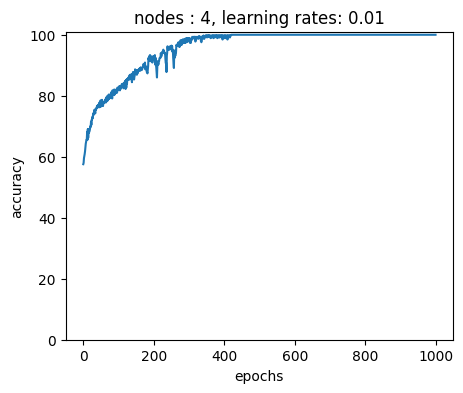

 19%|█▉        | 191/1000 [00:00<00:00, 967.38it/s]

epochs: 0  | accuray: 64.444 %
epochs: 1  | accuray: 59.778 %
epochs: 2  | accuray: 59.111 %
epochs: 3  | accuray: 57.778 %
epochs: 4  | accuray: 58.000 %
epochs: 5  | accuray: 57.556 %
epochs: 6  | accuray: 58.444 %
epochs: 7  | accuray: 59.111 %
epochs: 8  | accuray: 59.333 %
epochs: 9  | accuray: 59.556 %
epochs: 10  | accuray: 60.444 %
epochs: 11  | accuray: 60.889 %
epochs: 12  | accuray: 61.333 %
epochs: 13  | accuray: 61.778 %
epochs: 14  | accuray: 62.000 %
epochs: 15  | accuray: 62.222 %
epochs: 16  | accuray: 62.889 %
epochs: 17  | accuray: 63.556 %
epochs: 18  | accuray: 64.667 %
epochs: 19  | accuray: 65.556 %
epochs: 20  | accuray: 66.000 %
epochs: 21  | accuray: 66.667 %
epochs: 22  | accuray: 68.000 %
epochs: 23  | accuray: 69.778 %
epochs: 24  | accuray: 69.778 %
epochs: 25  | accuray: 71.111 %
epochs: 26  | accuray: 72.000 %
epochs: 27  | accuray: 72.889 %
epochs: 28  | accuray: 73.556 %
epochs: 29  | accuray: 74.444 %
epochs: 30  | accuray: 75.333 %
epochs: 31  | accu

 29%|██▉       | 288/1000 [00:00<00:00, 947.24it/s]

epochs: 191  | accuray: 91.111 %
epochs: 192  | accuray: 90.444 %
epochs: 193  | accuray: 89.556 %
epochs: 194  | accuray: 91.111 %
epochs: 195  | accuray: 91.111 %
epochs: 196  | accuray: 91.111 %
epochs: 197  | accuray: 89.778 %
epochs: 198  | accuray: 91.556 %
epochs: 199  | accuray: 91.333 %
epochs: 200  | accuray: 90.000 %
epochs: 201  | accuray: 91.778 %
epochs: 202  | accuray: 90.444 %
epochs: 203  | accuray: 90.889 %
epochs: 204  | accuray: 89.333 %
epochs: 205  | accuray: 90.889 %
epochs: 206  | accuray: 90.000 %
epochs: 207  | accuray: 91.556 %
epochs: 208  | accuray: 90.222 %
epochs: 209  | accuray: 92.000 %
epochs: 210  | accuray: 90.444 %
epochs: 211  | accuray: 91.556 %
epochs: 212  | accuray: 89.333 %
epochs: 213  | accuray: 91.111 %
epochs: 214  | accuray: 90.444 %
epochs: 215  | accuray: 91.778 %
epochs: 216  | accuray: 90.000 %
epochs: 217  | accuray: 92.000 %
epochs: 218  | accuray: 90.444 %
epochs: 219  | accuray: 90.889 %
epochs: 220  | accuray: 88.000 %
epochs: 22

 59%|█████▉    | 591/1000 [00:00<00:00, 986.68it/s]

epochs: 387  | accuray: 98.889 %
epochs: 388  | accuray: 98.889 %
epochs: 389  | accuray: 98.667 %
epochs: 390  | accuray: 98.889 %
epochs: 391  | accuray: 98.889 %
epochs: 392  | accuray: 98.444 %
epochs: 393  | accuray: 98.889 %
epochs: 394  | accuray: 98.889 %
epochs: 395  | accuray: 99.111 %
epochs: 396  | accuray: 99.111 %
epochs: 397  | accuray: 98.667 %
epochs: 398  | accuray: 99.111 %
epochs: 399  | accuray: 98.222 %
epochs: 400  | accuray: 97.333 %
epochs: 401  | accuray: 96.667 %
epochs: 402  | accuray: 97.778 %
epochs: 403  | accuray: 99.111 %
epochs: 404  | accuray: 99.333 %
epochs: 405  | accuray: 99.333 %
epochs: 406  | accuray: 99.333 %
epochs: 407  | accuray: 98.444 %
epochs: 408  | accuray: 99.333 %
epochs: 409  | accuray: 99.333 %
epochs: 410  | accuray: 98.889 %
epochs: 411  | accuray: 99.333 %
epochs: 412  | accuray: 99.333 %
epochs: 413  | accuray: 99.333 %
epochs: 414  | accuray: 99.333 %
epochs: 415  | accuray: 98.444 %
epochs: 416  | accuray: 98.889 %
epochs: 41

 69%|██████▉   | 690/1000 [00:00<00:00, 929.16it/s]

epochs: 591  | accuray: 100.000 %
epochs: 592  | accuray: 100.000 %
epochs: 593  | accuray: 100.000 %
epochs: 594  | accuray: 100.000 %
epochs: 595  | accuray: 100.000 %
epochs: 596  | accuray: 100.000 %
epochs: 597  | accuray: 100.000 %
epochs: 598  | accuray: 100.000 %
epochs: 599  | accuray: 100.000 %
epochs: 600  | accuray: 100.000 %
epochs: 601  | accuray: 100.000 %
epochs: 602  | accuray: 100.000 %
epochs: 603  | accuray: 100.000 %
epochs: 604  | accuray: 100.000 %
epochs: 605  | accuray: 100.000 %
epochs: 606  | accuray: 100.000 %
epochs: 607  | accuray: 100.000 %
epochs: 608  | accuray: 100.000 %
epochs: 609  | accuray: 100.000 %
epochs: 610  | accuray: 100.000 %
epochs: 611  | accuray: 100.000 %
epochs: 612  | accuray: 100.000 %
epochs: 613  | accuray: 100.000 %
epochs: 614  | accuray: 100.000 %
epochs: 615  | accuray: 100.000 %
epochs: 616  | accuray: 100.000 %
epochs: 617  | accuray: 100.000 %
epochs: 618  | accuray: 100.000 %
epochs: 619  | accuray: 100.000 %
epochs: 620  |

 88%|████████▊ | 877/1000 [00:00<00:00, 908.57it/s]

epochs: 772  | accuray: 100.000 %
epochs: 773  | accuray: 100.000 %
epochs: 774  | accuray: 100.000 %
epochs: 775  | accuray: 100.000 %
epochs: 776  | accuray: 100.000 %
epochs: 777  | accuray: 100.000 %
epochs: 778  | accuray: 100.000 %
epochs: 779  | accuray: 100.000 %
epochs: 780  | accuray: 100.000 %
epochs: 781  | accuray: 100.000 %
epochs: 782  | accuray: 100.000 %
epochs: 783  | accuray: 100.000 %
epochs: 784  | accuray: 100.000 %
epochs: 785  | accuray: 100.000 %
epochs: 786  | accuray: 100.000 %
epochs: 787  | accuray: 100.000 %
epochs: 788  | accuray: 100.000 %
epochs: 789  | accuray: 100.000 %
epochs: 790  | accuray: 100.000 %
epochs: 791  | accuray: 100.000 %
epochs: 792  | accuray: 100.000 %
epochs: 793  | accuray: 100.000 %
epochs: 794  | accuray: 100.000 %
epochs: 795  | accuray: 100.000 %
epochs: 796  | accuray: 100.000 %
epochs: 797  | accuray: 100.000 %
epochs: 798  | accuray: 100.000 %
epochs: 799  | accuray: 100.000 %
epochs: 800  | accuray: 100.000 %
epochs: 801  |

100%|██████████| 1000/1000 [00:01<00:00, 946.62it/s]


epochs: 969  | accuray: 100.000 %
epochs: 970  | accuray: 100.000 %
epochs: 971  | accuray: 100.000 %
epochs: 972  | accuray: 100.000 %
epochs: 973  | accuray: 100.000 %
epochs: 974  | accuray: 100.000 %
epochs: 975  | accuray: 100.000 %
epochs: 976  | accuray: 100.000 %
epochs: 977  | accuray: 100.000 %
epochs: 978  | accuray: 100.000 %
epochs: 979  | accuray: 100.000 %
epochs: 980  | accuray: 100.000 %
epochs: 981  | accuray: 100.000 %
epochs: 982  | accuray: 100.000 %
epochs: 983  | accuray: 100.000 %
epochs: 984  | accuray: 100.000 %
epochs: 985  | accuray: 100.000 %
epochs: 986  | accuray: 100.000 %
epochs: 987  | accuray: 100.000 %
epochs: 988  | accuray: 100.000 %
epochs: 989  | accuray: 100.000 %
epochs: 990  | accuray: 100.000 %
epochs: 991  | accuray: 100.000 %
epochs: 992  | accuray: 100.000 %
epochs: 993  | accuray: 100.000 %
epochs: 994  | accuray: 100.000 %
epochs: 995  | accuray: 100.000 %
epochs: 996  | accuray: 100.000 %
epochs: 997  | accuray: 100.000 %
epochs: 998  |

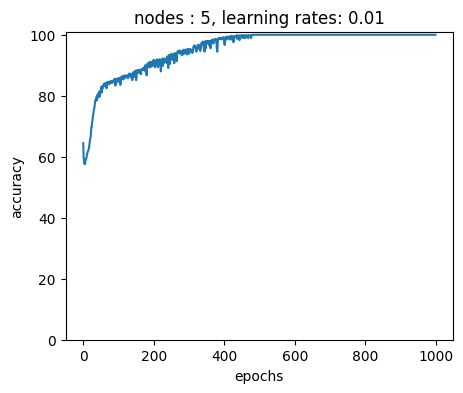

  0%|          | 0/1000 [00:00<?, ?it/s]

epochs: 0  | accuray: 49.556 %
epochs: 1  | accuray: 58.667 %
epochs: 2  | accuray: 61.333 %
epochs: 3  | accuray: 62.667 %
epochs: 4  | accuray: 66.889 %
epochs: 5  | accuray: 68.222 %
epochs: 6  | accuray: 69.778 %
epochs: 7  | accuray: 70.444 %
epochs: 8  | accuray: 72.000 %
epochs: 9  | accuray: 72.667 %
epochs: 10  | accuray: 73.333 %
epochs: 11  | accuray: 74.000 %
epochs: 12  | accuray: 74.667 %
epochs: 13  | accuray: 75.556 %
epochs: 14  | accuray: 75.778 %
epochs: 15  | accuray: 76.667 %
epochs: 16  | accuray: 77.111 %
epochs: 17  | accuray: 77.778 %
epochs: 18  | accuray: 78.222 %
epochs: 19  | accuray: 77.556 %
epochs: 20  | accuray: 78.000 %
epochs: 21  | accuray: 77.778 %
epochs: 22  | accuray: 77.333 %
epochs: 23  | accuray: 78.222 %
epochs: 24  | accuray: 77.778 %
epochs: 25  | accuray: 78.222 %
epochs: 26  | accuray: 78.222 %
epochs: 27  | accuray: 79.556 %
epochs: 28  | accuray: 78.444 %
epochs: 29  | accuray: 79.778 %
epochs: 30  | accuray: 79.111 %
epochs: 31  | accu

 19%|█▊        | 187/1000 [00:00<00:00, 934.78it/s]

epochs: 33  | accuray: 80.222 %
epochs: 34  | accuray: 79.111 %
epochs: 35  | accuray: 80.444 %
epochs: 36  | accuray: 80.000 %
epochs: 37  | accuray: 80.444 %
epochs: 38  | accuray: 79.556 %
epochs: 39  | accuray: 80.667 %
epochs: 40  | accuray: 80.000 %
epochs: 41  | accuray: 81.111 %
epochs: 42  | accuray: 80.444 %
epochs: 43  | accuray: 80.889 %
epochs: 44  | accuray: 80.444 %
epochs: 45  | accuray: 81.556 %
epochs: 46  | accuray: 80.000 %
epochs: 47  | accuray: 81.556 %
epochs: 48  | accuray: 80.667 %
epochs: 49  | accuray: 81.556 %
epochs: 50  | accuray: 81.111 %
epochs: 51  | accuray: 81.556 %
epochs: 52  | accuray: 81.111 %
epochs: 53  | accuray: 82.444 %
epochs: 54  | accuray: 81.778 %
epochs: 55  | accuray: 82.444 %
epochs: 56  | accuray: 82.667 %
epochs: 57  | accuray: 83.111 %
epochs: 58  | accuray: 83.556 %
epochs: 59  | accuray: 82.889 %
epochs: 60  | accuray: 83.778 %
epochs: 61  | accuray: 83.333 %
epochs: 62  | accuray: 84.000 %
epochs: 63  | accuray: 82.667 %
epochs: 

 28%|██▊       | 281/1000 [00:00<00:00, 838.85it/s]

epochs: 228  | accuray: 95.556 %
epochs: 229  | accuray: 95.111 %
epochs: 230  | accuray: 96.000 %
epochs: 231  | accuray: 94.889 %
epochs: 232  | accuray: 95.333 %
epochs: 233  | accuray: 95.111 %
epochs: 234  | accuray: 94.889 %
epochs: 235  | accuray: 95.111 %
epochs: 236  | accuray: 94.889 %
epochs: 237  | accuray: 95.111 %
epochs: 238  | accuray: 94.444 %
epochs: 239  | accuray: 94.222 %
epochs: 240  | accuray: 93.111 %
epochs: 241  | accuray: 93.333 %
epochs: 242  | accuray: 92.222 %
epochs: 243  | accuray: 92.667 %
epochs: 244  | accuray: 92.000 %
epochs: 245  | accuray: 92.889 %
epochs: 246  | accuray: 93.333 %
epochs: 247  | accuray: 94.222 %
epochs: 248  | accuray: 94.222 %
epochs: 249  | accuray: 94.667 %
epochs: 250  | accuray: 94.889 %
epochs: 251  | accuray: 96.000 %
epochs: 252  | accuray: 95.778 %
epochs: 253  | accuray: 96.667 %
epochs: 254  | accuray: 96.667 %
epochs: 255  | accuray: 96.444 %
epochs: 256  | accuray: 96.000 %
epochs: 257  | accuray: 96.889 %
epochs: 25

 38%|███▊      | 382/1000 [00:00<00:00, 899.93it/s]

epochs: 366  | accuray: 98.222 %
epochs: 367  | accuray: 99.111 %
epochs: 368  | accuray: 98.222 %
epochs: 369  | accuray: 98.889 %
epochs: 370  | accuray: 98.444 %
epochs: 371  | accuray: 98.889 %
epochs: 372  | accuray: 98.444 %
epochs: 373  | accuray: 98.889 %
epochs: 374  | accuray: 98.444 %
epochs: 375  | accuray: 99.111 %
epochs: 376  | accuray: 98.222 %
epochs: 377  | accuray: 99.111 %
epochs: 378  | accuray: 98.444 %
epochs: 379  | accuray: 99.111 %
epochs: 380  | accuray: 98.000 %
epochs: 381  | accuray: 99.111 %
epochs: 382  | accuray: 98.889 %
epochs: 383  | accuray: 98.667 %
epochs: 384  | accuray: 99.111 %
epochs: 385  | accuray: 99.111 %
epochs: 386  | accuray: 98.889 %
epochs: 387  | accuray: 99.333 %
epochs: 388  | accuray: 98.889 %
epochs: 389  | accuray: 98.889 %
epochs: 390  | accuray: 99.778 %
epochs: 391  | accuray: 99.556 %
epochs: 392  | accuray: 98.222 %
epochs: 393  | accuray: 97.333 %
epochs: 394  | accuray: 96.000 %
epochs: 395  | accuray: 96.000 %
epochs: 39

 48%|████▊     | 484/1000 [00:00<00:00, 939.40it/s]

epochs: 411  | accuray: 100.000 %
epochs: 412  | accuray: 100.000 %
epochs: 413  | accuray: 100.000 %
epochs: 414  | accuray: 100.000 %
epochs: 415  | accuray: 100.000 %
epochs: 416  | accuray: 100.000 %
epochs: 417  | accuray: 100.000 %
epochs: 418  | accuray: 100.000 %
epochs: 419  | accuray: 100.000 %
epochs: 420  | accuray: 100.000 %
epochs: 421  | accuray: 100.000 %
epochs: 422  | accuray: 100.000 %
epochs: 423  | accuray: 100.000 %
epochs: 424  | accuray: 100.000 %
epochs: 425  | accuray: 100.000 %
epochs: 426  | accuray: 100.000 %
epochs: 427  | accuray: 100.000 %
epochs: 428  | accuray: 100.000 %
epochs: 429  | accuray: 100.000 %
epochs: 430  | accuray: 100.000 %
epochs: 431  | accuray: 100.000 %
epochs: 432  | accuray: 100.000 %
epochs: 433  | accuray: 100.000 %
epochs: 434  | accuray: 100.000 %
epochs: 435  | accuray: 100.000 %
epochs: 436  | accuray: 100.000 %
epochs: 437  | accuray: 100.000 %
epochs: 438  | accuray: 100.000 %
epochs: 439  | accuray: 100.000 %
epochs: 440  |

 58%|█████▊    | 579/1000 [00:00<00:00, 930.76it/s]

epochs: 568  | accuray: 100.000 %
epochs: 569  | accuray: 100.000 %
epochs: 570  | accuray: 100.000 %
epochs: 571  | accuray: 100.000 %
epochs: 572  | accuray: 100.000 %
epochs: 573  | accuray: 100.000 %
epochs: 574  | accuray: 100.000 %
epochs: 575  | accuray: 100.000 %
epochs: 576  | accuray: 100.000 %
epochs: 577  | accuray: 100.000 %
epochs: 578  | accuray: 100.000 %
epochs: 579  | accuray: 100.000 %
epochs: 580  | accuray: 100.000 %
epochs: 581  | accuray: 100.000 %
epochs: 582  | accuray: 100.000 %
epochs: 583  | accuray: 100.000 %
epochs: 584  | accuray: 100.000 %
epochs: 585  | accuray: 100.000 %
epochs: 586  | accuray: 100.000 %
epochs: 587  | accuray: 100.000 %
epochs: 588  | accuray: 100.000 %
epochs: 589  | accuray: 100.000 %
epochs: 590  | accuray: 100.000 %
epochs: 591  | accuray: 100.000 %
epochs: 592  | accuray: 100.000 %
epochs: 593  | accuray: 100.000 %
epochs: 594  | accuray: 100.000 %
epochs: 595  | accuray: 100.000 %
epochs: 596  | accuray: 100.000 %
epochs: 597  |

 67%|██████▋   | 673/1000 [00:00<00:00, 898.85it/s]

epochs: 629  | accuray: 100.000 %
epochs: 630  | accuray: 100.000 %
epochs: 631  | accuray: 100.000 %
epochs: 632  | accuray: 100.000 %
epochs: 633  | accuray: 100.000 %
epochs: 634  | accuray: 100.000 %
epochs: 635  | accuray: 100.000 %
epochs: 636  | accuray: 100.000 %
epochs: 637  | accuray: 100.000 %
epochs: 638  | accuray: 100.000 %
epochs: 639  | accuray: 100.000 %
epochs: 640  | accuray: 100.000 %
epochs: 641  | accuray: 100.000 %
epochs: 642  | accuray: 100.000 %
epochs: 643  | accuray: 100.000 %
epochs: 644  | accuray: 100.000 %
epochs: 645  | accuray: 100.000 %
epochs: 646  | accuray: 100.000 %
epochs: 647  | accuray: 100.000 %
epochs: 648  | accuray: 100.000 %
epochs: 649  | accuray: 100.000 %
epochs: 650  | accuray: 100.000 %
epochs: 651  | accuray: 100.000 %
epochs: 652  | accuray: 100.000 %
epochs: 653  | accuray: 100.000 %
epochs: 654  | accuray: 100.000 %
epochs: 655  | accuray: 100.000 %
epochs: 656  | accuray: 100.000 %
epochs: 657  | accuray: 100.000 %
epochs: 658  |

 77%|███████▋  | 771/1000 [00:00<00:00, 923.21it/s]

epochs: 755  | accuray: 100.000 %
epochs: 756  | accuray: 100.000 %
epochs: 757  | accuray: 100.000 %
epochs: 758  | accuray: 100.000 %
epochs: 759  | accuray: 100.000 %
epochs: 760  | accuray: 100.000 %
epochs: 761  | accuray: 100.000 %
epochs: 762  | accuray: 100.000 %
epochs: 763  | accuray: 100.000 %
epochs: 764  | accuray: 100.000 %
epochs: 765  | accuray: 100.000 %
epochs: 766  | accuray: 100.000 %
epochs: 767  | accuray: 100.000 %
epochs: 768  | accuray: 100.000 %
epochs: 769  | accuray: 100.000 %
epochs: 770  | accuray: 100.000 %
epochs: 771  | accuray: 100.000 %
epochs: 772  | accuray: 100.000 %
epochs: 773  | accuray: 100.000 %
epochs: 774  | accuray: 100.000 %
epochs: 775  | accuray: 100.000 %
epochs: 776  | accuray: 100.000 %
epochs: 777  | accuray: 100.000 %
epochs: 778  | accuray: 100.000 %
epochs: 779  | accuray: 100.000 %
epochs: 780  | accuray: 100.000 %
epochs: 781  | accuray: 100.000 %
epochs: 782  | accuray: 100.000 %
epochs: 783  | accuray: 100.000 %
epochs: 784  |

 86%|████████▋ | 864/1000 [00:00<00:00, 853.21it/s]

epochs: 793  | accuray: 100.000 %
epochs: 794  | accuray: 100.000 %
epochs: 795  | accuray: 100.000 %
epochs: 796  | accuray: 100.000 %
epochs: 797  | accuray: 100.000 %
epochs: 798  | accuray: 100.000 %
epochs: 799  | accuray: 100.000 %
epochs: 800  | accuray: 100.000 %
epochs: 801  | accuray: 100.000 %
epochs: 802  | accuray: 100.000 %
epochs: 803  | accuray: 100.000 %
epochs: 804  | accuray: 100.000 %
epochs: 805  | accuray: 100.000 %
epochs: 806  | accuray: 100.000 %
epochs: 807  | accuray: 100.000 %
epochs: 808  | accuray: 100.000 %
epochs: 809  | accuray: 100.000 %
epochs: 810  | accuray: 100.000 %
epochs: 811  | accuray: 100.000 %
epochs: 812  | accuray: 100.000 %
epochs: 813  | accuray: 100.000 %
epochs: 814  | accuray: 100.000 %
epochs: 815  | accuray: 100.000 %
epochs: 816  | accuray: 100.000 %
epochs: 817  | accuray: 100.000 %
epochs: 818  | accuray: 100.000 %
epochs: 819  | accuray: 100.000 %
epochs: 820  | accuray: 100.000 %
epochs: 821  | accuray: 100.000 %
epochs: 822  |

 96%|█████████▌| 960/1000 [00:01<00:00, 879.69it/s]

epochs: 931  | accuray: 100.000 %
epochs: 932  | accuray: 100.000 %
epochs: 933  | accuray: 100.000 %
epochs: 934  | accuray: 100.000 %
epochs: 935  | accuray: 100.000 %
epochs: 936  | accuray: 100.000 %
epochs: 937  | accuray: 100.000 %
epochs: 938  | accuray: 100.000 %
epochs: 939  | accuray: 100.000 %
epochs: 940  | accuray: 100.000 %
epochs: 941  | accuray: 100.000 %
epochs: 942  | accuray: 100.000 %
epochs: 943  | accuray: 100.000 %
epochs: 944  | accuray: 100.000 %
epochs: 945  | accuray: 100.000 %
epochs: 946  | accuray: 100.000 %
epochs: 947  | accuray: 100.000 %
epochs: 948  | accuray: 100.000 %
epochs: 949  | accuray: 100.000 %
epochs: 950  | accuray: 100.000 %
epochs: 951  | accuray: 100.000 %
epochs: 952  | accuray: 100.000 %
epochs: 953  | accuray: 100.000 %
epochs: 954  | accuray: 100.000 %
epochs: 955  | accuray: 100.000 %
epochs: 956  | accuray: 100.000 %
epochs: 957  | accuray: 100.000 %
epochs: 958  | accuray: 100.000 %
epochs: 959  | accuray: 100.000 %
epochs: 960  |

100%|██████████| 1000/1000 [00:01<00:00, 891.72it/s]


epochs: 986  | accuray: 100.000 %
epochs: 987  | accuray: 100.000 %
epochs: 988  | accuray: 100.000 %
epochs: 989  | accuray: 100.000 %
epochs: 990  | accuray: 100.000 %
epochs: 991  | accuray: 100.000 %
epochs: 992  | accuray: 100.000 %
epochs: 993  | accuray: 100.000 %
epochs: 994  | accuray: 100.000 %
epochs: 995  | accuray: 100.000 %
epochs: 996  | accuray: 100.000 %
epochs: 997  | accuray: 100.000 %
epochs: 998  | accuray: 100.000 %
epochs: 999  | accuray: 100.000 %


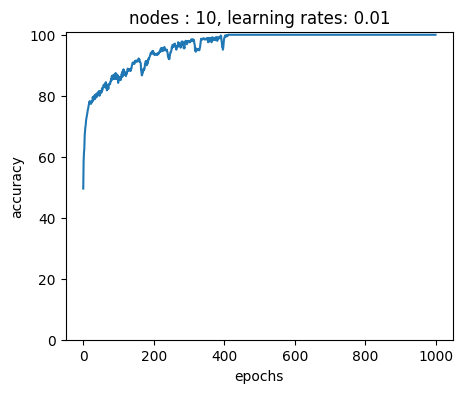

In [29]:
BPN_implement(1000,0.01,1)
BPN_implement(1000,0.01,2)
BPN_implement(1000,0.01,3)
BPN_implement(1000,0.01,4)
BPN_implement(1000,0.01,5)
BPN_implement(1000,0.01,10)

  6%|▋         | 64/1000 [00:00<00:01, 633.59it/s]

epochs: 0  | accuray: 46.889 %
epochs: 1  | accuray: 48.444 %
epochs: 2  | accuray: 49.333 %
epochs: 3  | accuray: 50.000 %
epochs: 4  | accuray: 50.222 %
epochs: 5  | accuray: 51.556 %
epochs: 6  | accuray: 52.222 %
epochs: 7  | accuray: 52.667 %
epochs: 8  | accuray: 53.333 %
epochs: 9  | accuray: 54.222 %
epochs: 10  | accuray: 54.667 %
epochs: 11  | accuray: 55.556 %
epochs: 12  | accuray: 56.889 %
epochs: 13  | accuray: 58.667 %
epochs: 14  | accuray: 59.333 %
epochs: 15  | accuray: 59.333 %
epochs: 16  | accuray: 59.556 %
epochs: 17  | accuray: 60.444 %
epochs: 18  | accuray: 60.444 %
epochs: 19  | accuray: 61.111 %
epochs: 20  | accuray: 61.333 %
epochs: 21  | accuray: 62.444 %
epochs: 22  | accuray: 63.556 %
epochs: 23  | accuray: 63.333 %
epochs: 24  | accuray: 64.000 %
epochs: 25  | accuray: 63.556 %
epochs: 26  | accuray: 68.222 %
epochs: 27  | accuray: 67.333 %
epochs: 28  | accuray: 72.444 %
epochs: 29  | accuray: 68.222 %
epochs: 30  | accuray: 73.778 %
epochs: 31  | accu

 24%|██▍       | 242/1000 [00:00<00:00, 825.94it/s]

epochs: 150  | accuray: 100.000 %
epochs: 151  | accuray: 100.000 %
epochs: 152  | accuray: 100.000 %
epochs: 153  | accuray: 100.000 %
epochs: 154  | accuray: 100.000 %
epochs: 155  | accuray: 100.000 %
epochs: 156  | accuray: 100.000 %
epochs: 157  | accuray: 100.000 %
epochs: 158  | accuray: 100.000 %
epochs: 159  | accuray: 100.000 %
epochs: 160  | accuray: 100.000 %
epochs: 161  | accuray: 100.000 %
epochs: 162  | accuray: 100.000 %
epochs: 163  | accuray: 100.000 %
epochs: 164  | accuray: 100.000 %
epochs: 165  | accuray: 100.000 %
epochs: 166  | accuray: 100.000 %
epochs: 167  | accuray: 100.000 %
epochs: 168  | accuray: 100.000 %
epochs: 169  | accuray: 100.000 %
epochs: 170  | accuray: 100.000 %
epochs: 171  | accuray: 100.000 %
epochs: 172  | accuray: 100.000 %
epochs: 173  | accuray: 100.000 %
epochs: 174  | accuray: 100.000 %
epochs: 175  | accuray: 100.000 %
epochs: 176  | accuray: 100.000 %
epochs: 177  | accuray: 100.000 %
epochs: 178  | accuray: 100.000 %
epochs: 179  |

 43%|████▎     | 432/1000 [00:00<00:00, 894.27it/s]

epochs: 334  | accuray: 100.000 %
epochs: 335  | accuray: 100.000 %
epochs: 336  | accuray: 100.000 %
epochs: 337  | accuray: 100.000 %
epochs: 338  | accuray: 100.000 %
epochs: 339  | accuray: 100.000 %
epochs: 340  | accuray: 100.000 %
epochs: 341  | accuray: 100.000 %
epochs: 342  | accuray: 100.000 %
epochs: 343  | accuray: 100.000 %
epochs: 344  | accuray: 100.000 %
epochs: 345  | accuray: 100.000 %
epochs: 346  | accuray: 100.000 %
epochs: 347  | accuray: 100.000 %
epochs: 348  | accuray: 100.000 %
epochs: 349  | accuray: 100.000 %
epochs: 350  | accuray: 100.000 %
epochs: 351  | accuray: 100.000 %
epochs: 352  | accuray: 100.000 %
epochs: 353  | accuray: 100.000 %
epochs: 354  | accuray: 100.000 %
epochs: 355  | accuray: 100.000 %
epochs: 356  | accuray: 100.000 %
epochs: 357  | accuray: 100.000 %
epochs: 358  | accuray: 100.000 %
epochs: 359  | accuray: 100.000 %
epochs: 360  | accuray: 100.000 %
epochs: 361  | accuray: 100.000 %
epochs: 362  | accuray: 100.000 %
epochs: 363  |

 72%|███████▏  | 717/1000 [00:00<00:00, 931.28it/s]

epochs: 525  | accuray: 100.000 %
epochs: 526  | accuray: 100.000 %
epochs: 527  | accuray: 100.000 %
epochs: 528  | accuray: 100.000 %
epochs: 529  | accuray: 100.000 %
epochs: 530  | accuray: 100.000 %
epochs: 531  | accuray: 100.000 %
epochs: 532  | accuray: 100.000 %
epochs: 533  | accuray: 100.000 %
epochs: 534  | accuray: 100.000 %
epochs: 535  | accuray: 100.000 %
epochs: 536  | accuray: 100.000 %
epochs: 537  | accuray: 100.000 %
epochs: 538  | accuray: 100.000 %
epochs: 539  | accuray: 100.000 %
epochs: 540  | accuray: 100.000 %
epochs: 541  | accuray: 100.000 %
epochs: 542  | accuray: 100.000 %
epochs: 543  | accuray: 100.000 %
epochs: 544  | accuray: 100.000 %
epochs: 545  | accuray: 100.000 %
epochs: 546  | accuray: 100.000 %
epochs: 547  | accuray: 100.000 %
epochs: 548  | accuray: 100.000 %
epochs: 549  | accuray: 100.000 %
epochs: 550  | accuray: 100.000 %
epochs: 551  | accuray: 100.000 %
epochs: 552  | accuray: 100.000 %
epochs: 553  | accuray: 100.000 %
epochs: 554  |

 90%|█████████ | 905/1000 [00:01<00:00, 927.22it/s]

epochs: 717  | accuray: 100.000 %
epochs: 718  | accuray: 100.000 %
epochs: 719  | accuray: 100.000 %
epochs: 720  | accuray: 100.000 %
epochs: 721  | accuray: 100.000 %
epochs: 722  | accuray: 100.000 %
epochs: 723  | accuray: 100.000 %
epochs: 724  | accuray: 100.000 %
epochs: 725  | accuray: 100.000 %
epochs: 726  | accuray: 100.000 %
epochs: 727  | accuray: 100.000 %
epochs: 728  | accuray: 100.000 %
epochs: 729  | accuray: 100.000 %
epochs: 730  | accuray: 100.000 %
epochs: 731  | accuray: 100.000 %
epochs: 732  | accuray: 100.000 %
epochs: 733  | accuray: 100.000 %
epochs: 734  | accuray: 100.000 %
epochs: 735  | accuray: 100.000 %
epochs: 736  | accuray: 100.000 %
epochs: 737  | accuray: 100.000 %
epochs: 738  | accuray: 100.000 %
epochs: 739  | accuray: 100.000 %
epochs: 740  | accuray: 100.000 %
epochs: 741  | accuray: 100.000 %
epochs: 742  | accuray: 100.000 %
epochs: 743  | accuray: 100.000 %
epochs: 744  | accuray: 100.000 %
epochs: 745  | accuray: 100.000 %
epochs: 746  |

100%|██████████| 1000/1000 [00:01<00:00, 899.60it/s]

epochs: 905  | accuray: 100.000 %
epochs: 906  | accuray: 100.000 %
epochs: 907  | accuray: 100.000 %
epochs: 908  | accuray: 100.000 %
epochs: 909  | accuray: 100.000 %
epochs: 910  | accuray: 100.000 %
epochs: 911  | accuray: 100.000 %
epochs: 912  | accuray: 100.000 %
epochs: 913  | accuray: 100.000 %
epochs: 914  | accuray: 100.000 %
epochs: 915  | accuray: 100.000 %
epochs: 916  | accuray: 100.000 %
epochs: 917  | accuray: 100.000 %
epochs: 918  | accuray: 100.000 %
epochs: 919  | accuray: 100.000 %
epochs: 920  | accuray: 100.000 %
epochs: 921  | accuray: 100.000 %
epochs: 922  | accuray: 100.000 %
epochs: 923  | accuray: 100.000 %
epochs: 924  | accuray: 100.000 %
epochs: 925  | accuray: 100.000 %
epochs: 926  | accuray: 100.000 %
epochs: 927  | accuray: 100.000 %
epochs: 928  | accuray: 100.000 %
epochs: 929  | accuray: 100.000 %
epochs: 930  | accuray: 100.000 %
epochs: 931  | accuray: 100.000 %
epochs: 932  | accuray: 100.000 %
epochs: 933  | accuray: 100.000 %
epochs: 934  |

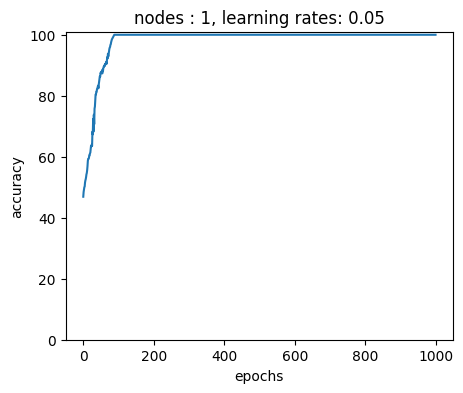

 19%|█▉        | 193/1000 [00:00<00:00, 974.65it/s]

epochs: 0  | accuray: 54.000 %
epochs: 1  | accuray: 56.000 %
epochs: 2  | accuray: 58.889 %
epochs: 3  | accuray: 61.111 %
epochs: 4  | accuray: 61.556 %
epochs: 5  | accuray: 65.778 %
epochs: 6  | accuray: 59.333 %
epochs: 7  | accuray: 62.667 %
epochs: 8  | accuray: 70.222 %
epochs: 9  | accuray: 64.000 %
epochs: 10  | accuray: 68.667 %
epochs: 11  | accuray: 74.000 %
epochs: 12  | accuray: 69.556 %
epochs: 13  | accuray: 75.333 %
epochs: 14  | accuray: 77.111 %
epochs: 15  | accuray: 81.111 %
epochs: 16  | accuray: 79.333 %
epochs: 17  | accuray: 82.889 %
epochs: 18  | accuray: 82.667 %
epochs: 19  | accuray: 84.000 %
epochs: 20  | accuray: 84.444 %
epochs: 21  | accuray: 85.333 %
epochs: 22  | accuray: 85.778 %
epochs: 23  | accuray: 85.333 %
epochs: 24  | accuray: 86.222 %
epochs: 25  | accuray: 86.222 %
epochs: 26  | accuray: 84.667 %
epochs: 27  | accuray: 86.000 %
epochs: 28  | accuray: 86.444 %
epochs: 29  | accuray: 87.111 %
epochs: 30  | accuray: 86.889 %
epochs: 31  | accu

 29%|██▉       | 291/1000 [00:00<00:00, 958.68it/s]

epochs: 193  | accuray: 100.000 %
epochs: 194  | accuray: 100.000 %
epochs: 195  | accuray: 100.000 %
epochs: 196  | accuray: 100.000 %
epochs: 197  | accuray: 100.000 %
epochs: 198  | accuray: 100.000 %
epochs: 199  | accuray: 100.000 %
epochs: 200  | accuray: 100.000 %
epochs: 201  | accuray: 100.000 %
epochs: 202  | accuray: 100.000 %
epochs: 203  | accuray: 100.000 %
epochs: 204  | accuray: 100.000 %
epochs: 205  | accuray: 100.000 %
epochs: 206  | accuray: 100.000 %
epochs: 207  | accuray: 100.000 %
epochs: 208  | accuray: 100.000 %
epochs: 209  | accuray: 100.000 %
epochs: 210  | accuray: 100.000 %
epochs: 211  | accuray: 100.000 %
epochs: 212  | accuray: 100.000 %
epochs: 213  | accuray: 100.000 %
epochs: 214  | accuray: 100.000 %
epochs: 215  | accuray: 100.000 %
epochs: 216  | accuray: 100.000 %
epochs: 217  | accuray: 100.000 %
epochs: 218  | accuray: 100.000 %
epochs: 219  | accuray: 100.000 %
epochs: 220  | accuray: 100.000 %
epochs: 221  | accuray: 100.000 %
epochs: 222  |

 60%|█████▉    | 598/1000 [00:00<00:00, 976.63it/s]

epochs: 372  | accuray: 100.000 %
epochs: 373  | accuray: 100.000 %
epochs: 374  | accuray: 100.000 %
epochs: 375  | accuray: 100.000 %
epochs: 376  | accuray: 100.000 %
epochs: 377  | accuray: 100.000 %
epochs: 378  | accuray: 100.000 %
epochs: 379  | accuray: 100.000 %
epochs: 380  | accuray: 100.000 %
epochs: 381  | accuray: 100.000 %
epochs: 382  | accuray: 100.000 %
epochs: 383  | accuray: 100.000 %
epochs: 384  | accuray: 100.000 %
epochs: 385  | accuray: 100.000 %
epochs: 386  | accuray: 100.000 %
epochs: 387  | accuray: 100.000 %
epochs: 388  | accuray: 100.000 %
epochs: 389  | accuray: 100.000 %
epochs: 390  | accuray: 100.000 %
epochs: 391  | accuray: 100.000 %
epochs: 392  | accuray: 100.000 %
epochs: 393  | accuray: 100.000 %
epochs: 394  | accuray: 100.000 %
epochs: 395  | accuray: 100.000 %
epochs: 396  | accuray: 100.000 %
epochs: 397  | accuray: 100.000 %
epochs: 398  | accuray: 100.000 %
epochs: 399  | accuray: 100.000 %
epochs: 400  | accuray: 100.000 %
epochs: 401  |

 81%|████████  | 811/1000 [00:00<00:00, 1018.85it/s]

epochs: 598  | accuray: 100.000 %
epochs: 599  | accuray: 100.000 %
epochs: 600  | accuray: 100.000 %
epochs: 601  | accuray: 100.000 %
epochs: 602  | accuray: 100.000 %
epochs: 603  | accuray: 100.000 %
epochs: 604  | accuray: 100.000 %
epochs: 605  | accuray: 100.000 %
epochs: 606  | accuray: 100.000 %
epochs: 607  | accuray: 100.000 %
epochs: 608  | accuray: 100.000 %
epochs: 609  | accuray: 100.000 %
epochs: 610  | accuray: 100.000 %
epochs: 611  | accuray: 100.000 %
epochs: 612  | accuray: 100.000 %
epochs: 613  | accuray: 100.000 %
epochs: 614  | accuray: 100.000 %
epochs: 615  | accuray: 100.000 %
epochs: 616  | accuray: 100.000 %
epochs: 617  | accuray: 100.000 %
epochs: 618  | accuray: 100.000 %
epochs: 619  | accuray: 100.000 %
epochs: 620  | accuray: 100.000 %
epochs: 621  | accuray: 100.000 %
epochs: 622  | accuray: 100.000 %
epochs: 623  | accuray: 100.000 %
epochs: 624  | accuray: 100.000 %
epochs: 625  | accuray: 100.000 %
epochs: 626  | accuray: 100.000 %
epochs: 627  |

100%|██████████| 1000/1000 [00:01<00:00, 978.77it/s]

epochs: 811  | accuray: 100.000 %
epochs: 812  | accuray: 100.000 %
epochs: 813  | accuray: 100.000 %
epochs: 814  | accuray: 100.000 %
epochs: 815  | accuray: 100.000 %
epochs: 816  | accuray: 100.000 %
epochs: 817  | accuray: 100.000 %
epochs: 818  | accuray: 100.000 %
epochs: 819  | accuray: 100.000 %
epochs: 820  | accuray: 100.000 %
epochs: 821  | accuray: 100.000 %
epochs: 822  | accuray: 100.000 %
epochs: 823  | accuray: 100.000 %
epochs: 824  | accuray: 100.000 %
epochs: 825  | accuray: 100.000 %
epochs: 826  | accuray: 100.000 %
epochs: 827  | accuray: 100.000 %
epochs: 828  | accuray: 100.000 %
epochs: 829  | accuray: 100.000 %
epochs: 830  | accuray: 100.000 %
epochs: 831  | accuray: 100.000 %
epochs: 832  | accuray: 100.000 %
epochs: 833  | accuray: 100.000 %
epochs: 834  | accuray: 100.000 %
epochs: 835  | accuray: 100.000 %
epochs: 836  | accuray: 100.000 %
epochs: 837  | accuray: 100.000 %
epochs: 838  | accuray: 100.000 %
epochs: 839  | accuray: 100.000 %
epochs: 840  |

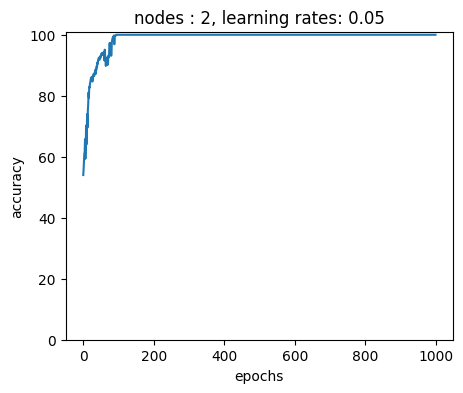

 20%|██        | 202/1000 [00:00<00:00, 997.93it/s] 

epochs: 0  | accuray: 57.111 %
epochs: 1  | accuray: 58.889 %
epochs: 2  | accuray: 60.000 %
epochs: 3  | accuray: 59.111 %
epochs: 4  | accuray: 61.111 %
epochs: 5  | accuray: 61.333 %
epochs: 6  | accuray: 61.111 %
epochs: 7  | accuray: 61.556 %
epochs: 8  | accuray: 62.000 %
epochs: 9  | accuray: 64.667 %
epochs: 10  | accuray: 63.111 %
epochs: 11  | accuray: 66.000 %
epochs: 12  | accuray: 64.889 %
epochs: 13  | accuray: 68.667 %
epochs: 14  | accuray: 65.778 %
epochs: 15  | accuray: 61.778 %
epochs: 16  | accuray: 67.111 %
epochs: 17  | accuray: 60.889 %
epochs: 18  | accuray: 68.444 %
epochs: 19  | accuray: 64.667 %
epochs: 20  | accuray: 76.444 %
epochs: 21  | accuray: 74.889 %
epochs: 22  | accuray: 76.222 %
epochs: 23  | accuray: 77.556 %
epochs: 24  | accuray: 78.444 %
epochs: 25  | accuray: 79.111 %
epochs: 26  | accuray: 79.778 %
epochs: 27  | accuray: 80.889 %
epochs: 28  | accuray: 79.778 %
epochs: 29  | accuray: 81.778 %
epochs: 30  | accuray: 78.667 %
epochs: 31  | accu

 30%|███       | 304/1000 [00:00<00:00, 1004.51it/s]

epochs: 202  | accuray: 100.000 %
epochs: 203  | accuray: 100.000 %
epochs: 204  | accuray: 100.000 %
epochs: 205  | accuray: 100.000 %
epochs: 206  | accuray: 100.000 %
epochs: 207  | accuray: 100.000 %
epochs: 208  | accuray: 100.000 %
epochs: 209  | accuray: 100.000 %
epochs: 210  | accuray: 100.000 %
epochs: 211  | accuray: 100.000 %
epochs: 212  | accuray: 100.000 %
epochs: 213  | accuray: 100.000 %
epochs: 214  | accuray: 100.000 %
epochs: 215  | accuray: 100.000 %
epochs: 216  | accuray: 100.000 %
epochs: 217  | accuray: 100.000 %
epochs: 218  | accuray: 100.000 %
epochs: 219  | accuray: 100.000 %
epochs: 220  | accuray: 100.000 %
epochs: 221  | accuray: 100.000 %
epochs: 222  | accuray: 100.000 %
epochs: 223  | accuray: 100.000 %
epochs: 224  | accuray: 100.000 %
epochs: 225  | accuray: 100.000 %
epochs: 226  | accuray: 100.000 %
epochs: 227  | accuray: 100.000 %
epochs: 228  | accuray: 100.000 %
epochs: 229  | accuray: 100.000 %
epochs: 230  | accuray: 100.000 %
epochs: 231  |

 61%|██████    | 611/1000 [00:00<00:00, 1003.75it/s]

epochs: 390  | accuray: 100.000 %
epochs: 391  | accuray: 100.000 %
epochs: 392  | accuray: 100.000 %
epochs: 393  | accuray: 100.000 %
epochs: 394  | accuray: 100.000 %
epochs: 395  | accuray: 100.000 %
epochs: 396  | accuray: 100.000 %
epochs: 397  | accuray: 100.000 %
epochs: 398  | accuray: 100.000 %
epochs: 399  | accuray: 100.000 %
epochs: 400  | accuray: 100.000 %
epochs: 401  | accuray: 100.000 %
epochs: 402  | accuray: 100.000 %
epochs: 403  | accuray: 100.000 %
epochs: 404  | accuray: 100.000 %
epochs: 405  | accuray: 100.000 %
epochs: 406  | accuray: 100.000 %
epochs: 407  | accuray: 100.000 %
epochs: 408  | accuray: 100.000 %
epochs: 409  | accuray: 100.000 %
epochs: 410  | accuray: 100.000 %
epochs: 411  | accuray: 100.000 %
epochs: 412  | accuray: 100.000 %
epochs: 413  | accuray: 100.000 %
epochs: 414  | accuray: 100.000 %
epochs: 415  | accuray: 100.000 %
epochs: 416  | accuray: 100.000 %
epochs: 417  | accuray: 100.000 %
epochs: 418  | accuray: 100.000 %
epochs: 419  |

 82%|████████▏ | 815/1000 [00:00<00:00, 1012.21it/s]

epochs: 611  | accuray: 100.000 %
epochs: 612  | accuray: 100.000 %
epochs: 613  | accuray: 100.000 %
epochs: 614  | accuray: 100.000 %
epochs: 615  | accuray: 100.000 %
epochs: 616  | accuray: 100.000 %
epochs: 617  | accuray: 100.000 %
epochs: 618  | accuray: 100.000 %
epochs: 619  | accuray: 100.000 %
epochs: 620  | accuray: 100.000 %
epochs: 621  | accuray: 100.000 %
epochs: 622  | accuray: 100.000 %
epochs: 623  | accuray: 100.000 %
epochs: 624  | accuray: 100.000 %
epochs: 625  | accuray: 100.000 %
epochs: 626  | accuray: 100.000 %
epochs: 627  | accuray: 100.000 %
epochs: 628  | accuray: 100.000 %
epochs: 629  | accuray: 100.000 %
epochs: 630  | accuray: 100.000 %
epochs: 631  | accuray: 100.000 %
epochs: 632  | accuray: 100.000 %
epochs: 633  | accuray: 100.000 %
epochs: 634  | accuray: 100.000 %
epochs: 635  | accuray: 100.000 %
epochs: 636  | accuray: 100.000 %
epochs: 637  | accuray: 100.000 %
epochs: 638  | accuray: 100.000 %
epochs: 639  | accuray: 100.000 %
epochs: 640  |

100%|██████████| 1000/1000 [00:00<00:00, 1004.59it/s]

epochs: 898  | accuray: 100.000 %
epochs: 899  | accuray: 100.000 %
epochs: 900  | accuray: 100.000 %
epochs: 901  | accuray: 100.000 %
epochs: 902  | accuray: 100.000 %
epochs: 903  | accuray: 100.000 %
epochs: 904  | accuray: 100.000 %
epochs: 905  | accuray: 100.000 %
epochs: 906  | accuray: 100.000 %
epochs: 907  | accuray: 100.000 %
epochs: 908  | accuray: 100.000 %
epochs: 909  | accuray: 100.000 %
epochs: 910  | accuray: 100.000 %
epochs: 911  | accuray: 100.000 %
epochs: 912  | accuray: 100.000 %
epochs: 913  | accuray: 100.000 %
epochs: 914  | accuray: 100.000 %
epochs: 915  | accuray: 100.000 %
epochs: 916  | accuray: 100.000 %
epochs: 917  | accuray: 100.000 %
epochs: 918  | accuray: 100.000 %
epochs: 919  | accuray: 100.000 %
epochs: 920  | accuray: 100.000 %
epochs: 921  | accuray: 100.000 %
epochs: 922  | accuray: 100.000 %
epochs: 923  | accuray: 100.000 %
epochs: 924  | accuray: 100.000 %
epochs: 925  | accuray: 100.000 %
epochs: 926  | accuray: 100.000 %
epochs: 927  |

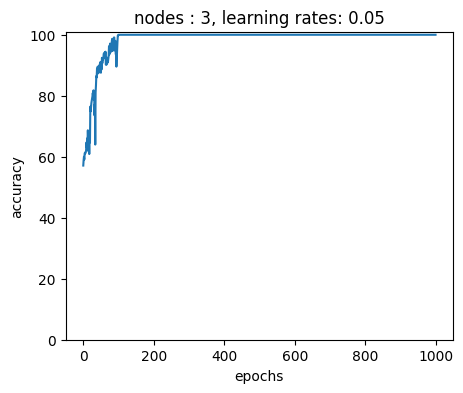

 16%|█▌        | 157/1000 [00:00<00:01, 791.97it/s]

epochs: 0  | accuray: 57.556 %
epochs: 1  | accuray: 64.667 %
epochs: 2  | accuray: 58.000 %
epochs: 3  | accuray: 64.667 %
epochs: 4  | accuray: 62.889 %
epochs: 5  | accuray: 65.778 %
epochs: 6  | accuray: 62.222 %
epochs: 7  | accuray: 72.000 %
epochs: 8  | accuray: 70.222 %
epochs: 9  | accuray: 58.889 %
epochs: 10  | accuray: 73.778 %
epochs: 11  | accuray: 60.000 %
epochs: 12  | accuray: 73.333 %
epochs: 13  | accuray: 74.889 %
epochs: 14  | accuray: 76.222 %
epochs: 15  | accuray: 78.667 %
epochs: 16  | accuray: 78.000 %
epochs: 17  | accuray: 80.889 %
epochs: 18  | accuray: 80.444 %
epochs: 19  | accuray: 81.333 %
epochs: 20  | accuray: 80.667 %
epochs: 21  | accuray: 82.667 %
epochs: 22  | accuray: 81.111 %
epochs: 23  | accuray: 82.667 %
epochs: 24  | accuray: 80.667 %
epochs: 25  | accuray: 82.000 %
epochs: 26  | accuray: 80.444 %
epochs: 27  | accuray: 81.111 %
epochs: 28  | accuray: 80.000 %
epochs: 29  | accuray: 82.222 %
epochs: 30  | accuray: 81.111 %
epochs: 31  | accu

 35%|███▌      | 351/1000 [00:00<00:00, 902.20it/s]

epochs: 157  | accuray: 100.000 %
epochs: 158  | accuray: 100.000 %
epochs: 159  | accuray: 100.000 %
epochs: 160  | accuray: 100.000 %
epochs: 161  | accuray: 100.000 %
epochs: 162  | accuray: 100.000 %
epochs: 163  | accuray: 100.000 %
epochs: 164  | accuray: 100.000 %
epochs: 165  | accuray: 100.000 %
epochs: 166  | accuray: 100.000 %
epochs: 167  | accuray: 100.000 %
epochs: 168  | accuray: 100.000 %
epochs: 169  | accuray: 100.000 %
epochs: 170  | accuray: 100.000 %
epochs: 171  | accuray: 100.000 %
epochs: 172  | accuray: 100.000 %
epochs: 173  | accuray: 100.000 %
epochs: 174  | accuray: 100.000 %
epochs: 175  | accuray: 100.000 %
epochs: 176  | accuray: 100.000 %
epochs: 177  | accuray: 100.000 %
epochs: 178  | accuray: 100.000 %
epochs: 179  | accuray: 100.000 %
epochs: 180  | accuray: 100.000 %
epochs: 181  | accuray: 100.000 %
epochs: 182  | accuray: 100.000 %
epochs: 183  | accuray: 100.000 %
epochs: 184  | accuray: 100.000 %
epochs: 185  | accuray: 100.000 %
epochs: 186  |

 55%|█████▍    | 546/1000 [00:00<00:00, 944.51it/s]

epochs: 351  | accuray: 100.000 %
epochs: 352  | accuray: 100.000 %
epochs: 353  | accuray: 100.000 %
epochs: 354  | accuray: 100.000 %
epochs: 355  | accuray: 100.000 %
epochs: 356  | accuray: 100.000 %
epochs: 357  | accuray: 100.000 %
epochs: 358  | accuray: 100.000 %
epochs: 359  | accuray: 100.000 %
epochs: 360  | accuray: 100.000 %
epochs: 361  | accuray: 100.000 %
epochs: 362  | accuray: 100.000 %
epochs: 363  | accuray: 100.000 %
epochs: 364  | accuray: 100.000 %
epochs: 365  | accuray: 100.000 %
epochs: 366  | accuray: 100.000 %
epochs: 367  | accuray: 100.000 %
epochs: 368  | accuray: 100.000 %
epochs: 369  | accuray: 100.000 %
epochs: 370  | accuray: 100.000 %
epochs: 371  | accuray: 100.000 %
epochs: 372  | accuray: 100.000 %
epochs: 373  | accuray: 100.000 %
epochs: 374  | accuray: 100.000 %
epochs: 375  | accuray: 100.000 %
epochs: 376  | accuray: 100.000 %
epochs: 377  | accuray: 100.000 %
epochs: 378  | accuray: 100.000 %
epochs: 379  | accuray: 100.000 %
epochs: 380  |

 64%|██████▍   | 641/1000 [00:00<00:00, 935.35it/s]

epochs: 546  | accuray: 100.000 %
epochs: 547  | accuray: 100.000 %
epochs: 548  | accuray: 100.000 %
epochs: 549  | accuray: 100.000 %
epochs: 550  | accuray: 100.000 %
epochs: 551  | accuray: 100.000 %
epochs: 552  | accuray: 100.000 %
epochs: 553  | accuray: 100.000 %
epochs: 554  | accuray: 100.000 %
epochs: 555  | accuray: 100.000 %
epochs: 556  | accuray: 100.000 %
epochs: 557  | accuray: 100.000 %
epochs: 558  | accuray: 100.000 %
epochs: 559  | accuray: 100.000 %
epochs: 560  | accuray: 100.000 %
epochs: 561  | accuray: 100.000 %
epochs: 562  | accuray: 100.000 %
epochs: 563  | accuray: 100.000 %
epochs: 564  | accuray: 100.000 %
epochs: 565  | accuray: 100.000 %
epochs: 566  | accuray: 100.000 %
epochs: 567  | accuray: 100.000 %
epochs: 568  | accuray: 100.000 %
epochs: 569  | accuray: 100.000 %
epochs: 570  | accuray: 100.000 %
epochs: 571  | accuray: 100.000 %
epochs: 572  | accuray: 100.000 %
epochs: 573  | accuray: 100.000 %
epochs: 574  | accuray: 100.000 %
epochs: 575  |

 95%|█████████▍| 946/1000 [00:01<00:00, 949.90it/s]

epochs: 730  | accuray: 100.000 %
epochs: 731  | accuray: 100.000 %
epochs: 732  | accuray: 100.000 %
epochs: 733  | accuray: 100.000 %
epochs: 734  | accuray: 100.000 %
epochs: 735  | accuray: 100.000 %
epochs: 736  | accuray: 100.000 %
epochs: 737  | accuray: 100.000 %
epochs: 738  | accuray: 100.000 %
epochs: 739  | accuray: 100.000 %
epochs: 740  | accuray: 100.000 %
epochs: 741  | accuray: 100.000 %
epochs: 742  | accuray: 100.000 %
epochs: 743  | accuray: 100.000 %
epochs: 744  | accuray: 100.000 %
epochs: 745  | accuray: 100.000 %
epochs: 746  | accuray: 100.000 %
epochs: 747  | accuray: 100.000 %
epochs: 748  | accuray: 100.000 %
epochs: 749  | accuray: 100.000 %
epochs: 750  | accuray: 100.000 %
epochs: 751  | accuray: 100.000 %
epochs: 752  | accuray: 100.000 %
epochs: 753  | accuray: 100.000 %
epochs: 754  | accuray: 100.000 %
epochs: 755  | accuray: 100.000 %
epochs: 756  | accuray: 100.000 %
epochs: 757  | accuray: 100.000 %
epochs: 758  | accuray: 100.000 %
epochs: 759  |

100%|██████████| 1000/1000 [00:01<00:00, 913.15it/s]


epochs: 946  | accuray: 100.000 %
epochs: 947  | accuray: 100.000 %
epochs: 948  | accuray: 100.000 %
epochs: 949  | accuray: 100.000 %
epochs: 950  | accuray: 100.000 %
epochs: 951  | accuray: 100.000 %
epochs: 952  | accuray: 100.000 %
epochs: 953  | accuray: 100.000 %
epochs: 954  | accuray: 100.000 %
epochs: 955  | accuray: 100.000 %
epochs: 956  | accuray: 100.000 %
epochs: 957  | accuray: 100.000 %
epochs: 958  | accuray: 100.000 %
epochs: 959  | accuray: 100.000 %
epochs: 960  | accuray: 100.000 %
epochs: 961  | accuray: 100.000 %
epochs: 962  | accuray: 100.000 %
epochs: 963  | accuray: 100.000 %
epochs: 964  | accuray: 100.000 %
epochs: 965  | accuray: 100.000 %
epochs: 966  | accuray: 100.000 %
epochs: 967  | accuray: 100.000 %
epochs: 968  | accuray: 100.000 %
epochs: 969  | accuray: 100.000 %
epochs: 970  | accuray: 100.000 %
epochs: 971  | accuray: 100.000 %
epochs: 972  | accuray: 100.000 %
epochs: 973  | accuray: 100.000 %
epochs: 974  | accuray: 100.000 %
epochs: 975  |

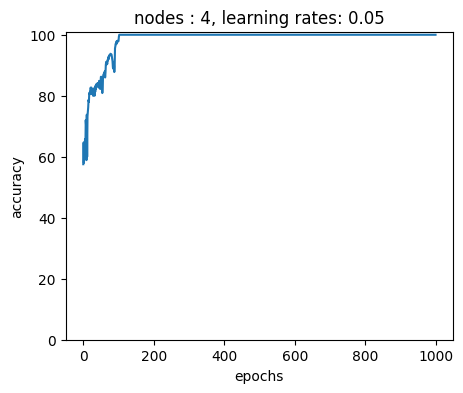

 10%|█         | 104/1000 [00:00<00:00, 1033.56it/s]

epochs: 0  | accuray: 64.444 %
epochs: 1  | accuray: 58.000 %
epochs: 2  | accuray: 59.556 %
epochs: 3  | accuray: 62.000 %
epochs: 4  | accuray: 61.778 %
epochs: 5  | accuray: 61.778 %
epochs: 6  | accuray: 64.222 %
epochs: 7  | accuray: 65.556 %
epochs: 8  | accuray: 64.000 %
epochs: 9  | accuray: 61.778 %
epochs: 10  | accuray: 70.000 %
epochs: 11  | accuray: 72.889 %
epochs: 12  | accuray: 72.444 %
epochs: 13  | accuray: 72.000 %
epochs: 14  | accuray: 69.556 %
epochs: 15  | accuray: 62.889 %
epochs: 16  | accuray: 72.667 %
epochs: 17  | accuray: 79.778 %
epochs: 18  | accuray: 83.333 %
epochs: 19  | accuray: 84.667 %
epochs: 20  | accuray: 84.889 %
epochs: 21  | accuray: 85.333 %
epochs: 22  | accuray: 85.556 %
epochs: 23  | accuray: 84.889 %
epochs: 24  | accuray: 85.778 %
epochs: 25  | accuray: 86.222 %
epochs: 26  | accuray: 85.778 %
epochs: 27  | accuray: 86.889 %
epochs: 28  | accuray: 86.222 %
epochs: 29  | accuray: 87.111 %
epochs: 30  | accuray: 86.222 %
epochs: 31  | accu

 41%|████▏     | 413/1000 [00:00<00:00, 1018.14it/s]

epochs: 208  | accuray: 100.000 %
epochs: 209  | accuray: 100.000 %
epochs: 210  | accuray: 100.000 %
epochs: 211  | accuray: 100.000 %
epochs: 212  | accuray: 100.000 %
epochs: 213  | accuray: 100.000 %
epochs: 214  | accuray: 100.000 %
epochs: 215  | accuray: 100.000 %
epochs: 216  | accuray: 100.000 %
epochs: 217  | accuray: 100.000 %
epochs: 218  | accuray: 100.000 %
epochs: 219  | accuray: 100.000 %
epochs: 220  | accuray: 100.000 %
epochs: 221  | accuray: 100.000 %
epochs: 222  | accuray: 100.000 %
epochs: 223  | accuray: 100.000 %
epochs: 224  | accuray: 100.000 %
epochs: 225  | accuray: 100.000 %
epochs: 226  | accuray: 100.000 %
epochs: 227  | accuray: 100.000 %
epochs: 228  | accuray: 100.000 %
epochs: 229  | accuray: 100.000 %
epochs: 230  | accuray: 100.000 %
epochs: 231  | accuray: 100.000 %
epochs: 232  | accuray: 100.000 %
epochs: 233  | accuray: 100.000 %
epochs: 234  | accuray: 100.000 %
epochs: 235  | accuray: 100.000 %
epochs: 236  | accuray: 100.000 %
epochs: 237  |

 52%|█████▏    | 515/1000 [00:00<00:00, 983.85it/s] 

epochs: 413  | accuray: 100.000 %
epochs: 414  | accuray: 100.000 %
epochs: 415  | accuray: 100.000 %
epochs: 416  | accuray: 100.000 %
epochs: 417  | accuray: 100.000 %
epochs: 418  | accuray: 100.000 %
epochs: 419  | accuray: 100.000 %
epochs: 420  | accuray: 100.000 %
epochs: 421  | accuray: 100.000 %
epochs: 422  | accuray: 100.000 %
epochs: 423  | accuray: 100.000 %
epochs: 424  | accuray: 100.000 %
epochs: 425  | accuray: 100.000 %
epochs: 426  | accuray: 100.000 %
epochs: 427  | accuray: 100.000 %
epochs: 428  | accuray: 100.000 %
epochs: 429  | accuray: 100.000 %
epochs: 430  | accuray: 100.000 %
epochs: 431  | accuray: 100.000 %
epochs: 432  | accuray: 100.000 %
epochs: 433  | accuray: 100.000 %
epochs: 434  | accuray: 100.000 %
epochs: 435  | accuray: 100.000 %
epochs: 436  | accuray: 100.000 %
epochs: 437  | accuray: 100.000 %
epochs: 438  | accuray: 100.000 %
epochs: 439  | accuray: 100.000 %
epochs: 440  | accuray: 100.000 %
epochs: 441  | accuray: 100.000 %
epochs: 442  |

 73%|███████▎  | 728/1000 [00:00<00:00, 1025.22it/s]

epochs: 603  | accuray: 100.000 %
epochs: 604  | accuray: 100.000 %
epochs: 605  | accuray: 100.000 %
epochs: 606  | accuray: 100.000 %
epochs: 607  | accuray: 100.000 %
epochs: 608  | accuray: 100.000 %
epochs: 609  | accuray: 100.000 %
epochs: 610  | accuray: 100.000 %
epochs: 611  | accuray: 100.000 %
epochs: 612  | accuray: 100.000 %
epochs: 613  | accuray: 100.000 %
epochs: 614  | accuray: 100.000 %
epochs: 615  | accuray: 100.000 %
epochs: 616  | accuray: 100.000 %
epochs: 617  | accuray: 100.000 %
epochs: 618  | accuray: 100.000 %
epochs: 619  | accuray: 100.000 %
epochs: 620  | accuray: 100.000 %
epochs: 621  | accuray: 100.000 %
epochs: 622  | accuray: 100.000 %
epochs: 623  | accuray: 100.000 %
epochs: 624  | accuray: 100.000 %
epochs: 625  | accuray: 100.000 %
epochs: 626  | accuray: 100.000 %
epochs: 627  | accuray: 100.000 %
epochs: 628  | accuray: 100.000 %
epochs: 629  | accuray: 100.000 %
epochs: 630  | accuray: 100.000 %
epochs: 631  | accuray: 100.000 %
epochs: 632  |

100%|██████████| 1000/1000 [00:01<00:00, 988.57it/s]

epochs: 798  | accuray: 100.000 %
epochs: 799  | accuray: 100.000 %
epochs: 800  | accuray: 100.000 %
epochs: 801  | accuray: 100.000 %
epochs: 802  | accuray: 100.000 %
epochs: 803  | accuray: 100.000 %
epochs: 804  | accuray: 100.000 %
epochs: 805  | accuray: 100.000 %
epochs: 806  | accuray: 100.000 %
epochs: 807  | accuray: 100.000 %
epochs: 808  | accuray: 100.000 %
epochs: 809  | accuray: 100.000 %
epochs: 810  | accuray: 100.000 %
epochs: 811  | accuray: 100.000 %
epochs: 812  | accuray: 100.000 %
epochs: 813  | accuray: 100.000 %
epochs: 814  | accuray: 100.000 %
epochs: 815  | accuray: 100.000 %
epochs: 816  | accuray: 100.000 %
epochs: 817  | accuray: 100.000 %
epochs: 818  | accuray: 100.000 %
epochs: 819  | accuray: 100.000 %
epochs: 820  | accuray: 100.000 %
epochs: 821  | accuray: 100.000 %
epochs: 822  | accuray: 100.000 %
epochs: 823  | accuray: 100.000 %
epochs: 824  | accuray: 100.000 %
epochs: 825  | accuray: 100.000 %
epochs: 826  | accuray: 100.000 %
epochs: 827  |

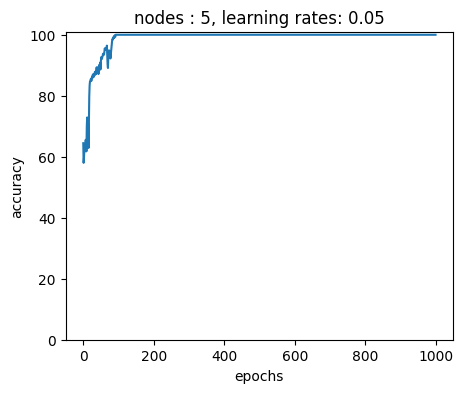

 21%|██        | 206/1000 [00:00<00:00, 1024.37it/s]

epochs: 0  | accuray: 49.556 %
epochs: 1  | accuray: 59.333 %
epochs: 2  | accuray: 62.222 %
epochs: 3  | accuray: 57.556 %
epochs: 4  | accuray: 55.333 %
epochs: 5  | accuray: 68.222 %
epochs: 6  | accuray: 72.000 %
epochs: 7  | accuray: 62.000 %
epochs: 8  | accuray: 71.111 %
epochs: 9  | accuray: 63.778 %
epochs: 10  | accuray: 68.222 %
epochs: 11  | accuray: 61.111 %
epochs: 12  | accuray: 79.778 %
epochs: 13  | accuray: 79.333 %
epochs: 14  | accuray: 80.222 %
epochs: 15  | accuray: 79.778 %
epochs: 16  | accuray: 76.444 %
epochs: 17  | accuray: 78.000 %
epochs: 18  | accuray: 75.778 %
epochs: 19  | accuray: 78.222 %
epochs: 20  | accuray: 69.778 %
epochs: 21  | accuray: 77.556 %
epochs: 22  | accuray: 80.222 %
epochs: 23  | accuray: 77.111 %
epochs: 24  | accuray: 76.667 %
epochs: 25  | accuray: 79.333 %
epochs: 26  | accuray: 78.889 %
epochs: 27  | accuray: 78.222 %
epochs: 28  | accuray: 78.000 %
epochs: 29  | accuray: 80.000 %
epochs: 30  | accuray: 79.778 %
epochs: 31  | accu

 41%|████      | 412/1000 [00:00<00:00, 1014.54it/s]

epochs: 206  | accuray: 100.000 %
epochs: 207  | accuray: 100.000 %
epochs: 208  | accuray: 100.000 %
epochs: 209  | accuray: 100.000 %
epochs: 210  | accuray: 100.000 %
epochs: 211  | accuray: 100.000 %
epochs: 212  | accuray: 100.000 %
epochs: 213  | accuray: 100.000 %
epochs: 214  | accuray: 100.000 %
epochs: 215  | accuray: 100.000 %
epochs: 216  | accuray: 100.000 %
epochs: 217  | accuray: 100.000 %
epochs: 218  | accuray: 100.000 %
epochs: 219  | accuray: 100.000 %
epochs: 220  | accuray: 100.000 %
epochs: 221  | accuray: 100.000 %
epochs: 222  | accuray: 100.000 %
epochs: 223  | accuray: 100.000 %
epochs: 224  | accuray: 100.000 %
epochs: 225  | accuray: 100.000 %
epochs: 226  | accuray: 100.000 %
epochs: 227  | accuray: 100.000 %
epochs: 228  | accuray: 100.000 %
epochs: 229  | accuray: 100.000 %
epochs: 230  | accuray: 100.000 %
epochs: 231  | accuray: 100.000 %
epochs: 232  | accuray: 100.000 %
epochs: 233  | accuray: 100.000 %
epochs: 234  | accuray: 100.000 %
epochs: 235  |

 62%|██████▏   | 619/1000 [00:00<00:00, 1001.02it/s]

epochs: 412  | accuray: 100.000 %
epochs: 413  | accuray: 100.000 %
epochs: 414  | accuray: 100.000 %
epochs: 415  | accuray: 100.000 %
epochs: 416  | accuray: 100.000 %
epochs: 417  | accuray: 100.000 %
epochs: 418  | accuray: 100.000 %
epochs: 419  | accuray: 100.000 %
epochs: 420  | accuray: 100.000 %
epochs: 421  | accuray: 100.000 %
epochs: 422  | accuray: 100.000 %
epochs: 423  | accuray: 100.000 %
epochs: 424  | accuray: 100.000 %
epochs: 425  | accuray: 100.000 %
epochs: 426  | accuray: 100.000 %
epochs: 427  | accuray: 100.000 %
epochs: 428  | accuray: 100.000 %
epochs: 429  | accuray: 100.000 %
epochs: 430  | accuray: 100.000 %
epochs: 431  | accuray: 100.000 %
epochs: 432  | accuray: 100.000 %
epochs: 433  | accuray: 100.000 %
epochs: 434  | accuray: 100.000 %
epochs: 435  | accuray: 100.000 %
epochs: 436  | accuray: 100.000 %
epochs: 437  | accuray: 100.000 %
epochs: 438  | accuray: 100.000 %
epochs: 439  | accuray: 100.000 %
epochs: 440  | accuray: 100.000 %
epochs: 441  |

 82%|████████▏ | 824/1000 [00:00<00:00, 1002.46it/s]

epochs: 619  | accuray: 100.000 %
epochs: 620  | accuray: 100.000 %
epochs: 621  | accuray: 100.000 %
epochs: 622  | accuray: 100.000 %
epochs: 623  | accuray: 100.000 %
epochs: 624  | accuray: 100.000 %
epochs: 625  | accuray: 100.000 %
epochs: 626  | accuray: 100.000 %
epochs: 627  | accuray: 100.000 %
epochs: 628  | accuray: 100.000 %
epochs: 629  | accuray: 100.000 %
epochs: 630  | accuray: 100.000 %
epochs: 631  | accuray: 100.000 %
epochs: 632  | accuray: 100.000 %
epochs: 633  | accuray: 100.000 %
epochs: 634  | accuray: 100.000 %
epochs: 635  | accuray: 100.000 %
epochs: 636  | accuray: 100.000 %
epochs: 637  | accuray: 100.000 %
epochs: 638  | accuray: 100.000 %
epochs: 639  | accuray: 100.000 %
epochs: 640  | accuray: 100.000 %
epochs: 641  | accuray: 100.000 %
epochs: 642  | accuray: 100.000 %
epochs: 643  | accuray: 100.000 %
epochs: 644  | accuray: 100.000 %
epochs: 645  | accuray: 100.000 %
epochs: 646  | accuray: 100.000 %
epochs: 647  | accuray: 100.000 %
epochs: 648  |

100%|██████████| 1000/1000 [00:01<00:00, 993.53it/s]

epochs: 824  | accuray: 100.000 %
epochs: 825  | accuray: 100.000 %
epochs: 826  | accuray: 100.000 %
epochs: 827  | accuray: 100.000 %
epochs: 828  | accuray: 100.000 %
epochs: 829  | accuray: 100.000 %
epochs: 830  | accuray: 100.000 %
epochs: 831  | accuray: 100.000 %
epochs: 832  | accuray: 100.000 %
epochs: 833  | accuray: 100.000 %
epochs: 834  | accuray: 100.000 %
epochs: 835  | accuray: 100.000 %
epochs: 836  | accuray: 100.000 %
epochs: 837  | accuray: 100.000 %
epochs: 838  | accuray: 100.000 %
epochs: 839  | accuray: 100.000 %
epochs: 840  | accuray: 100.000 %
epochs: 841  | accuray: 100.000 %
epochs: 842  | accuray: 100.000 %
epochs: 843  | accuray: 100.000 %
epochs: 844  | accuray: 100.000 %
epochs: 845  | accuray: 100.000 %
epochs: 846  | accuray: 100.000 %
epochs: 847  | accuray: 100.000 %
epochs: 848  | accuray: 100.000 %
epochs: 849  | accuray: 100.000 %
epochs: 850  | accuray: 100.000 %
epochs: 851  | accuray: 100.000 %
epochs: 852  | accuray: 100.000 %
epochs: 853  |

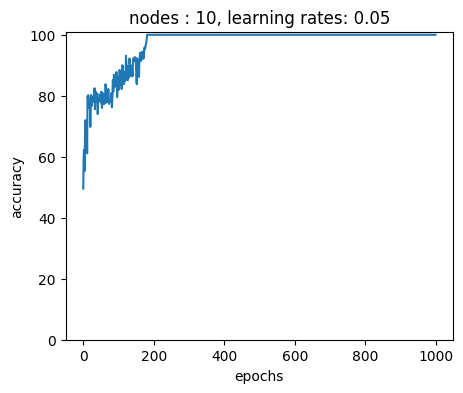

In [30]:
BPN_implement(1000,0.05,1)
BPN_implement(1000,0.05,2)
BPN_implement(1000,0.05,3)
BPN_implement(1000,0.05,4)
BPN_implement(1000,0.05,5)
BPN_implement(1000,0.05,10)

 18%|█▊        | 180/1000 [00:00<00:00, 888.28it/s]

epochs: 0  | accuray: 46.889 %
epochs: 1  | accuray: 56.000 %
epochs: 2  | accuray: 56.889 %
epochs: 3  | accuray: 55.556 %
epochs: 4  | accuray: 66.667 %
epochs: 5  | accuray: 57.556 %
epochs: 6  | accuray: 66.667 %
epochs: 7  | accuray: 64.667 %
epochs: 8  | accuray: 66.667 %
epochs: 9  | accuray: 55.556 %
epochs: 10  | accuray: 67.778 %
epochs: 11  | accuray: 62.889 %
epochs: 12  | accuray: 55.556 %
epochs: 13  | accuray: 66.667 %
epochs: 14  | accuray: 64.222 %
epochs: 15  | accuray: 44.444 %
epochs: 16  | accuray: 68.222 %
epochs: 17  | accuray: 55.778 %
epochs: 18  | accuray: 56.667 %
epochs: 19  | accuray: 66.222 %
epochs: 20  | accuray: 70.444 %
epochs: 21  | accuray: 44.444 %
epochs: 22  | accuray: 55.556 %
epochs: 23  | accuray: 70.222 %
epochs: 24  | accuray: 55.556 %
epochs: 25  | accuray: 66.444 %
epochs: 26  | accuray: 66.667 %
epochs: 27  | accuray: 68.000 %
epochs: 28  | accuray: 68.667 %
epochs: 29  | accuray: 64.222 %
epochs: 30  | accuray: 55.556 %
epochs: 31  | accu

 36%|███▌      | 359/1000 [00:00<00:00, 891.21it/s]

epochs: 180  | accuray: 100.000 %
epochs: 181  | accuray: 100.000 %
epochs: 182  | accuray: 100.000 %
epochs: 183  | accuray: 100.000 %
epochs: 184  | accuray: 100.000 %
epochs: 185  | accuray: 100.000 %
epochs: 186  | accuray: 100.000 %
epochs: 187  | accuray: 100.000 %
epochs: 188  | accuray: 100.000 %
epochs: 189  | accuray: 100.000 %
epochs: 190  | accuray: 100.000 %
epochs: 191  | accuray: 100.000 %
epochs: 192  | accuray: 100.000 %
epochs: 193  | accuray: 100.000 %
epochs: 194  | accuray: 100.000 %
epochs: 195  | accuray: 100.000 %
epochs: 196  | accuray: 100.000 %
epochs: 197  | accuray: 100.000 %
epochs: 198  | accuray: 100.000 %
epochs: 199  | accuray: 100.000 %
epochs: 200  | accuray: 100.000 %
epochs: 201  | accuray: 100.000 %
epochs: 202  | accuray: 100.000 %
epochs: 203  | accuray: 100.000 %
epochs: 204  | accuray: 100.000 %
epochs: 205  | accuray: 100.000 %
epochs: 206  | accuray: 100.000 %
epochs: 207  | accuray: 100.000 %
epochs: 208  | accuray: 100.000 %
epochs: 209  |

 45%|████▍     | 449/1000 [00:00<00:00, 821.25it/s]

epochs: 359  | accuray: 100.000 %
epochs: 360  | accuray: 100.000 %
epochs: 361  | accuray: 100.000 %
epochs: 362  | accuray: 100.000 %
epochs: 363  | accuray: 100.000 %
epochs: 364  | accuray: 100.000 %
epochs: 365  | accuray: 100.000 %
epochs: 366  | accuray: 100.000 %
epochs: 367  | accuray: 100.000 %
epochs: 368  | accuray: 100.000 %
epochs: 369  | accuray: 100.000 %
epochs: 370  | accuray: 100.000 %
epochs: 371  | accuray: 100.000 %
epochs: 372  | accuray: 100.000 %
epochs: 373  | accuray: 100.000 %
epochs: 374  | accuray: 100.000 %
epochs: 375  | accuray: 100.000 %
epochs: 376  | accuray: 100.000 %
epochs: 377  | accuray: 100.000 %
epochs: 378  | accuray: 100.000 %
epochs: 379  | accuray: 100.000 %
epochs: 380  | accuray: 100.000 %
epochs: 381  | accuray: 100.000 %
epochs: 382  | accuray: 100.000 %
epochs: 383  | accuray: 100.000 %
epochs: 384  | accuray: 100.000 %
epochs: 385  | accuray: 100.000 %
epochs: 386  | accuray: 100.000 %
epochs: 387  | accuray: 100.000 %
epochs: 388  |

 73%|███████▎  | 726/1000 [00:00<00:00, 893.11it/s]

epochs: 527  | accuray: 100.000 %
epochs: 528  | accuray: 100.000 %
epochs: 529  | accuray: 100.000 %
epochs: 530  | accuray: 100.000 %
epochs: 531  | accuray: 100.000 %
epochs: 532  | accuray: 100.000 %
epochs: 533  | accuray: 100.000 %
epochs: 534  | accuray: 100.000 %
epochs: 535  | accuray: 100.000 %
epochs: 536  | accuray: 100.000 %
epochs: 537  | accuray: 100.000 %
epochs: 538  | accuray: 100.000 %
epochs: 539  | accuray: 100.000 %
epochs: 540  | accuray: 100.000 %
epochs: 541  | accuray: 100.000 %
epochs: 542  | accuray: 100.000 %
epochs: 543  | accuray: 100.000 %
epochs: 544  | accuray: 100.000 %
epochs: 545  | accuray: 100.000 %
epochs: 546  | accuray: 100.000 %
epochs: 547  | accuray: 100.000 %
epochs: 548  | accuray: 100.000 %
epochs: 549  | accuray: 100.000 %
epochs: 550  | accuray: 100.000 %
epochs: 551  | accuray: 100.000 %
epochs: 552  | accuray: 100.000 %
epochs: 553  | accuray: 100.000 %
epochs: 554  | accuray: 100.000 %
epochs: 555  | accuray: 100.000 %
epochs: 556  |

 91%|█████████ | 912/1000 [00:01<00:00, 908.71it/s]

epochs: 726  | accuray: 100.000 %
epochs: 727  | accuray: 100.000 %
epochs: 728  | accuray: 100.000 %
epochs: 729  | accuray: 100.000 %
epochs: 730  | accuray: 100.000 %
epochs: 731  | accuray: 100.000 %
epochs: 732  | accuray: 100.000 %
epochs: 733  | accuray: 100.000 %
epochs: 734  | accuray: 100.000 %
epochs: 735  | accuray: 100.000 %
epochs: 736  | accuray: 100.000 %
epochs: 737  | accuray: 100.000 %
epochs: 738  | accuray: 100.000 %
epochs: 739  | accuray: 100.000 %
epochs: 740  | accuray: 100.000 %
epochs: 741  | accuray: 100.000 %
epochs: 742  | accuray: 100.000 %
epochs: 743  | accuray: 100.000 %
epochs: 744  | accuray: 100.000 %
epochs: 745  | accuray: 100.000 %
epochs: 746  | accuray: 100.000 %
epochs: 747  | accuray: 100.000 %
epochs: 748  | accuray: 100.000 %
epochs: 749  | accuray: 100.000 %
epochs: 750  | accuray: 100.000 %
epochs: 751  | accuray: 100.000 %
epochs: 752  | accuray: 100.000 %
epochs: 753  | accuray: 100.000 %
epochs: 754  | accuray: 100.000 %
epochs: 755  |

100%|██████████| 1000/1000 [00:01<00:00, 889.86it/s]

epochs: 912  | accuray: 100.000 %
epochs: 913  | accuray: 100.000 %
epochs: 914  | accuray: 100.000 %
epochs: 915  | accuray: 100.000 %
epochs: 916  | accuray: 100.000 %
epochs: 917  | accuray: 100.000 %
epochs: 918  | accuray: 100.000 %
epochs: 919  | accuray: 100.000 %
epochs: 920  | accuray: 100.000 %
epochs: 921  | accuray: 100.000 %
epochs: 922  | accuray: 100.000 %
epochs: 923  | accuray: 100.000 %
epochs: 924  | accuray: 100.000 %
epochs: 925  | accuray: 100.000 %
epochs: 926  | accuray: 100.000 %
epochs: 927  | accuray: 100.000 %
epochs: 928  | accuray: 100.000 %
epochs: 929  | accuray: 100.000 %
epochs: 930  | accuray: 100.000 %
epochs: 931  | accuray: 100.000 %
epochs: 932  | accuray: 100.000 %
epochs: 933  | accuray: 100.000 %
epochs: 934  | accuray: 100.000 %
epochs: 935  | accuray: 100.000 %
epochs: 936  | accuray: 100.000 %
epochs: 937  | accuray: 100.000 %
epochs: 938  | accuray: 100.000 %
epochs: 939  | accuray: 100.000 %
epochs: 940  | accuray: 100.000 %
epochs: 941  |

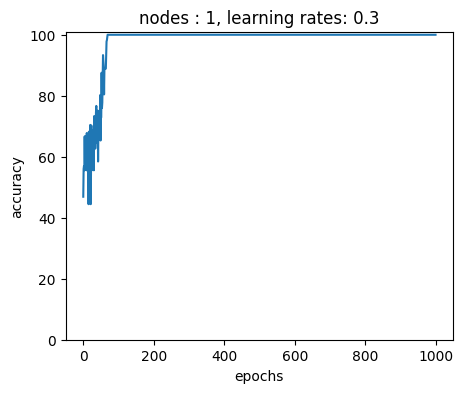

 21%|██        | 210/1000 [00:00<00:00, 1020.57it/s]

epochs: 0  | accuray: 54.000 %
epochs: 1  | accuray: 62.000 %
epochs: 2  | accuray: 55.556 %
epochs: 3  | accuray: 51.111 %
epochs: 4  | accuray: 66.667 %
epochs: 5  | accuray: 64.667 %
epochs: 6  | accuray: 67.111 %
epochs: 7  | accuray: 55.556 %
epochs: 8  | accuray: 66.667 %
epochs: 9  | accuray: 66.667 %
epochs: 10  | accuray: 66.667 %
epochs: 11  | accuray: 67.333 %
epochs: 12  | accuray: 55.556 %
epochs: 13  | accuray: 55.556 %
epochs: 14  | accuray: 55.556 %
epochs: 15  | accuray: 66.667 %
epochs: 16  | accuray: 55.556 %
epochs: 17  | accuray: 55.556 %
epochs: 18  | accuray: 60.222 %
epochs: 19  | accuray: 66.667 %
epochs: 20  | accuray: 66.667 %
epochs: 21  | accuray: 66.667 %
epochs: 22  | accuray: 66.667 %
epochs: 23  | accuray: 66.667 %
epochs: 24  | accuray: 66.667 %
epochs: 25  | accuray: 66.667 %
epochs: 26  | accuray: 66.667 %
epochs: 27  | accuray: 55.556 %
epochs: 28  | accuray: 66.667 %
epochs: 29  | accuray: 66.667 %
epochs: 30  | accuray: 66.667 %
epochs: 31  | accu

 31%|███▏      | 313/1000 [00:00<00:00, 992.46it/s] 

epochs: 210  | accuray: 66.667 %
epochs: 211  | accuray: 66.667 %
epochs: 212  | accuray: 66.667 %
epochs: 213  | accuray: 66.667 %
epochs: 214  | accuray: 66.667 %
epochs: 215  | accuray: 66.667 %
epochs: 216  | accuray: 66.667 %
epochs: 217  | accuray: 66.667 %
epochs: 218  | accuray: 66.667 %
epochs: 219  | accuray: 66.667 %
epochs: 220  | accuray: 66.667 %
epochs: 221  | accuray: 66.667 %
epochs: 222  | accuray: 66.667 %
epochs: 223  | accuray: 66.667 %
epochs: 224  | accuray: 66.667 %
epochs: 225  | accuray: 66.667 %
epochs: 226  | accuray: 66.667 %
epochs: 227  | accuray: 66.667 %
epochs: 228  | accuray: 66.667 %
epochs: 229  | accuray: 66.667 %
epochs: 230  | accuray: 66.667 %
epochs: 231  | accuray: 66.667 %
epochs: 232  | accuray: 66.667 %
epochs: 233  | accuray: 66.667 %
epochs: 234  | accuray: 66.667 %
epochs: 235  | accuray: 66.667 %
epochs: 236  | accuray: 66.667 %
epochs: 237  | accuray: 66.667 %
epochs: 238  | accuray: 66.667 %
epochs: 239  | accuray: 66.667 %
epochs: 24

 51%|█████     | 512/1000 [00:00<00:00, 976.71it/s]

epochs: 402  | accuray: 66.667 %
epochs: 403  | accuray: 66.667 %
epochs: 404  | accuray: 66.667 %
epochs: 405  | accuray: 66.667 %
epochs: 406  | accuray: 66.667 %
epochs: 407  | accuray: 66.667 %
epochs: 408  | accuray: 66.667 %
epochs: 409  | accuray: 66.667 %
epochs: 410  | accuray: 66.667 %
epochs: 411  | accuray: 66.667 %
epochs: 412  | accuray: 66.667 %
epochs: 413  | accuray: 66.667 %
epochs: 414  | accuray: 66.667 %
epochs: 415  | accuray: 66.667 %
epochs: 416  | accuray: 66.667 %
epochs: 417  | accuray: 66.667 %
epochs: 418  | accuray: 66.667 %
epochs: 419  | accuray: 66.667 %
epochs: 420  | accuray: 66.667 %
epochs: 421  | accuray: 66.667 %
epochs: 422  | accuray: 66.667 %
epochs: 423  | accuray: 66.667 %
epochs: 424  | accuray: 66.667 %
epochs: 425  | accuray: 66.667 %
epochs: 426  | accuray: 66.667 %
epochs: 427  | accuray: 66.667 %
epochs: 428  | accuray: 66.667 %
epochs: 429  | accuray: 66.667 %
epochs: 430  | accuray: 66.667 %
epochs: 431  | accuray: 66.667 %
epochs: 43

 81%|████████  | 811/1000 [00:00<00:00, 976.60it/s]

epochs: 606  | accuray: 66.667 %
epochs: 607  | accuray: 66.667 %
epochs: 608  | accuray: 66.667 %
epochs: 609  | accuray: 66.667 %
epochs: 610  | accuray: 66.667 %
epochs: 611  | accuray: 66.667 %
epochs: 612  | accuray: 66.667 %
epochs: 613  | accuray: 66.667 %
epochs: 614  | accuray: 66.667 %
epochs: 615  | accuray: 66.667 %
epochs: 616  | accuray: 66.667 %
epochs: 617  | accuray: 66.667 %
epochs: 618  | accuray: 66.667 %
epochs: 619  | accuray: 66.667 %
epochs: 620  | accuray: 66.667 %
epochs: 621  | accuray: 66.667 %
epochs: 622  | accuray: 66.667 %
epochs: 623  | accuray: 70.222 %
epochs: 624  | accuray: 55.556 %
epochs: 625  | accuray: 61.111 %
epochs: 626  | accuray: 66.667 %
epochs: 627  | accuray: 66.667 %
epochs: 628  | accuray: 66.667 %
epochs: 629  | accuray: 66.667 %
epochs: 630  | accuray: 66.667 %
epochs: 631  | accuray: 66.667 %
epochs: 632  | accuray: 66.667 %
epochs: 633  | accuray: 66.667 %
epochs: 634  | accuray: 66.667 %
epochs: 635  | accuray: 66.667 %
epochs: 63

100%|██████████| 1000/1000 [00:01<00:00, 971.43it/s]

epochs: 811  | accuray: 66.667 %
epochs: 812  | accuray: 66.667 %
epochs: 813  | accuray: 66.667 %
epochs: 814  | accuray: 66.667 %
epochs: 815  | accuray: 66.667 %
epochs: 816  | accuray: 66.667 %
epochs: 817  | accuray: 66.667 %
epochs: 818  | accuray: 66.667 %
epochs: 819  | accuray: 66.667 %
epochs: 820  | accuray: 66.667 %
epochs: 821  | accuray: 66.667 %
epochs: 822  | accuray: 66.667 %
epochs: 823  | accuray: 66.667 %
epochs: 824  | accuray: 66.667 %
epochs: 825  | accuray: 66.667 %
epochs: 826  | accuray: 66.667 %
epochs: 827  | accuray: 66.667 %
epochs: 828  | accuray: 66.667 %
epochs: 829  | accuray: 66.667 %
epochs: 830  | accuray: 66.667 %
epochs: 831  | accuray: 66.667 %
epochs: 832  | accuray: 66.667 %
epochs: 833  | accuray: 66.667 %
epochs: 834  | accuray: 66.667 %
epochs: 835  | accuray: 66.667 %
epochs: 836  | accuray: 66.667 %
epochs: 837  | accuray: 66.667 %
epochs: 838  | accuray: 66.667 %
epochs: 839  | accuray: 66.667 %
epochs: 840  | accuray: 66.667 %
epochs: 84

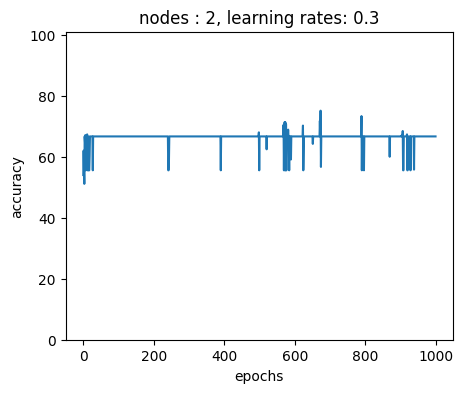

 10%|▉         | 95/1000 [00:00<00:00, 935.68it/s]

epochs: 0  | accuray: 57.111 %
epochs: 1  | accuray: 63.111 %
epochs: 2  | accuray: 44.444 %
epochs: 3  | accuray: 57.111 %
epochs: 4  | accuray: 64.889 %
epochs: 5  | accuray: 66.667 %
epochs: 6  | accuray: 60.889 %
epochs: 7  | accuray: 55.556 %
epochs: 8  | accuray: 55.556 %
epochs: 9  | accuray: 55.556 %
epochs: 10  | accuray: 46.444 %
epochs: 11  | accuray: 55.556 %
epochs: 12  | accuray: 66.667 %
epochs: 13  | accuray: 66.667 %
epochs: 14  | accuray: 66.667 %
epochs: 15  | accuray: 66.667 %
epochs: 16  | accuray: 66.667 %
epochs: 17  | accuray: 66.667 %
epochs: 18  | accuray: 66.667 %
epochs: 19  | accuray: 66.667 %
epochs: 20  | accuray: 66.667 %
epochs: 21  | accuray: 66.667 %
epochs: 22  | accuray: 55.556 %
epochs: 23  | accuray: 55.556 %
epochs: 24  | accuray: 66.667 %
epochs: 25  | accuray: 66.667 %
epochs: 26  | accuray: 66.667 %
epochs: 27  | accuray: 66.667 %
epochs: 28  | accuray: 60.000 %
epochs: 29  | accuray: 66.667 %
epochs: 30  | accuray: 66.667 %
epochs: 31  | accu

 35%|███▌      | 354/1000 [00:00<00:00, 812.45it/s]

epochs: 181  | accuray: 66.667 %
epochs: 182  | accuray: 66.667 %
epochs: 183  | accuray: 66.667 %
epochs: 184  | accuray: 66.667 %
epochs: 185  | accuray: 66.667 %
epochs: 186  | accuray: 66.667 %
epochs: 187  | accuray: 66.667 %
epochs: 188  | accuray: 66.667 %
epochs: 189  | accuray: 66.667 %
epochs: 190  | accuray: 66.667 %
epochs: 191  | accuray: 66.667 %
epochs: 192  | accuray: 66.667 %
epochs: 193  | accuray: 66.667 %
epochs: 194  | accuray: 66.667 %
epochs: 195  | accuray: 66.667 %
epochs: 196  | accuray: 66.667 %
epochs: 197  | accuray: 66.667 %
epochs: 198  | accuray: 66.667 %
epochs: 199  | accuray: 66.667 %
epochs: 200  | accuray: 66.667 %
epochs: 201  | accuray: 66.667 %
epochs: 202  | accuray: 66.667 %
epochs: 203  | accuray: 66.667 %
epochs: 204  | accuray: 66.667 %
epochs: 205  | accuray: 66.667 %
epochs: 206  | accuray: 66.667 %
epochs: 207  | accuray: 66.667 %
epochs: 208  | accuray: 66.667 %
epochs: 209  | accuray: 66.667 %
epochs: 210  | accuray: 66.667 %
epochs: 21

 52%|█████▏    | 522/1000 [00:00<00:00, 822.89it/s]

epochs: 354  | accuray: 66.667 %
epochs: 355  | accuray: 66.667 %
epochs: 356  | accuray: 66.667 %
epochs: 357  | accuray: 66.667 %
epochs: 358  | accuray: 66.667 %
epochs: 359  | accuray: 66.667 %
epochs: 360  | accuray: 66.667 %
epochs: 361  | accuray: 66.667 %
epochs: 362  | accuray: 66.667 %
epochs: 363  | accuray: 66.667 %
epochs: 364  | accuray: 66.667 %
epochs: 365  | accuray: 66.667 %
epochs: 366  | accuray: 66.667 %
epochs: 367  | accuray: 66.667 %
epochs: 368  | accuray: 66.667 %
epochs: 369  | accuray: 66.667 %
epochs: 370  | accuray: 66.667 %
epochs: 371  | accuray: 66.667 %
epochs: 372  | accuray: 66.667 %
epochs: 373  | accuray: 66.667 %
epochs: 374  | accuray: 66.667 %
epochs: 375  | accuray: 66.667 %
epochs: 376  | accuray: 66.667 %
epochs: 377  | accuray: 66.667 %
epochs: 378  | accuray: 66.667 %
epochs: 379  | accuray: 66.667 %
epochs: 380  | accuray: 66.667 %
epochs: 381  | accuray: 66.667 %
epochs: 382  | accuray: 66.667 %
epochs: 383  | accuray: 66.667 %
epochs: 38

 62%|██████▎   | 625/1000 [00:00<00:00, 886.45it/s]

epochs: 522  | accuray: 66.667 %
epochs: 523  | accuray: 66.667 %
epochs: 524  | accuray: 66.667 %
epochs: 525  | accuray: 66.667 %
epochs: 526  | accuray: 66.667 %
epochs: 527  | accuray: 66.667 %
epochs: 528  | accuray: 66.667 %
epochs: 529  | accuray: 66.667 %
epochs: 530  | accuray: 66.667 %
epochs: 531  | accuray: 66.667 %
epochs: 532  | accuray: 66.667 %
epochs: 533  | accuray: 66.667 %
epochs: 534  | accuray: 66.667 %
epochs: 535  | accuray: 66.667 %
epochs: 536  | accuray: 66.667 %
epochs: 537  | accuray: 66.667 %
epochs: 538  | accuray: 66.667 %
epochs: 539  | accuray: 66.667 %
epochs: 540  | accuray: 66.667 %
epochs: 541  | accuray: 66.667 %
epochs: 542  | accuray: 66.667 %
epochs: 543  | accuray: 66.667 %
epochs: 544  | accuray: 74.889 %
epochs: 545  | accuray: 70.444 %
epochs: 546  | accuray: 55.556 %
epochs: 547  | accuray: 66.667 %
epochs: 548  | accuray: 66.667 %
epochs: 549  | accuray: 66.667 %
epochs: 550  | accuray: 66.667 %
epochs: 551  | accuray: 66.667 %
epochs: 55

 83%|████████▎ | 834/1000 [00:00<00:00, 972.43it/s]

epochs: 718  | accuray: 66.667 %
epochs: 719  | accuray: 66.667 %
epochs: 720  | accuray: 66.667 %
epochs: 721  | accuray: 66.667 %
epochs: 722  | accuray: 68.444 %
epochs: 723  | accuray: 64.889 %
epochs: 724  | accuray: 66.667 %
epochs: 725  | accuray: 66.667 %
epochs: 726  | accuray: 66.667 %
epochs: 727  | accuray: 66.667 %
epochs: 728  | accuray: 66.667 %
epochs: 729  | accuray: 66.667 %
epochs: 730  | accuray: 66.667 %
epochs: 731  | accuray: 73.111 %
epochs: 732  | accuray: 61.333 %
epochs: 733  | accuray: 66.667 %
epochs: 734  | accuray: 66.667 %
epochs: 735  | accuray: 66.667 %
epochs: 736  | accuray: 66.667 %
epochs: 737  | accuray: 66.667 %
epochs: 738  | accuray: 66.667 %
epochs: 739  | accuray: 66.667 %
epochs: 740  | accuray: 66.667 %
epochs: 741  | accuray: 66.667 %
epochs: 742  | accuray: 66.667 %
epochs: 743  | accuray: 66.667 %
epochs: 744  | accuray: 66.667 %
epochs: 745  | accuray: 66.667 %
epochs: 746  | accuray: 66.667 %
epochs: 747  | accuray: 66.667 %
epochs: 74

100%|██████████| 1000/1000 [00:01<00:00, 901.39it/s]


epochs: 918  | accuray: 77.778 %
epochs: 919  | accuray: 77.778 %
epochs: 920  | accuray: 77.778 %
epochs: 921  | accuray: 77.778 %
epochs: 922  | accuray: 77.778 %
epochs: 923  | accuray: 77.778 %
epochs: 924  | accuray: 77.778 %
epochs: 925  | accuray: 77.778 %
epochs: 926  | accuray: 77.778 %
epochs: 927  | accuray: 77.778 %
epochs: 928  | accuray: 77.778 %
epochs: 929  | accuray: 77.778 %
epochs: 930  | accuray: 77.778 %
epochs: 931  | accuray: 77.778 %
epochs: 932  | accuray: 77.778 %
epochs: 933  | accuray: 77.778 %
epochs: 934  | accuray: 77.778 %
epochs: 935  | accuray: 77.778 %
epochs: 936  | accuray: 77.778 %
epochs: 937  | accuray: 80.222 %
epochs: 938  | accuray: 66.667 %
epochs: 939  | accuray: 81.111 %
epochs: 940  | accuray: 66.667 %
epochs: 941  | accuray: 66.667 %
epochs: 942  | accuray: 77.778 %
epochs: 943  | accuray: 77.778 %
epochs: 944  | accuray: 77.778 %
epochs: 945  | accuray: 77.778 %
epochs: 946  | accuray: 77.778 %
epochs: 947  | accuray: 77.778 %
epochs: 94

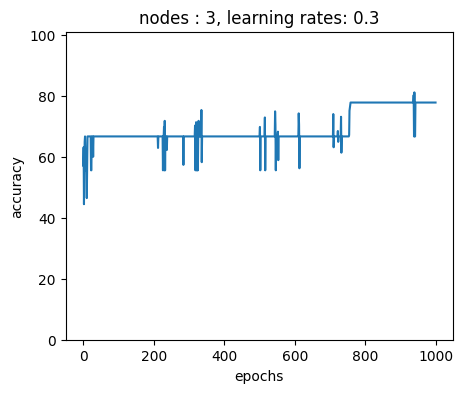

 22%|██▏       | 224/1000 [00:00<00:00, 1095.68it/s]

epochs: 0  | accuray: 57.556 %
epochs: 1  | accuray: 66.667 %
epochs: 2  | accuray: 36.222 %
epochs: 3  | accuray: 56.444 %
epochs: 4  | accuray: 44.444 %
epochs: 5  | accuray: 44.444 %
epochs: 6  | accuray: 44.444 %
epochs: 7  | accuray: 44.444 %
epochs: 8  | accuray: 55.556 %
epochs: 9  | accuray: 44.444 %
epochs: 10  | accuray: 44.444 %
epochs: 11  | accuray: 49.556 %
epochs: 12  | accuray: 55.556 %
epochs: 13  | accuray: 55.556 %
epochs: 14  | accuray: 55.556 %
epochs: 15  | accuray: 55.556 %
epochs: 16  | accuray: 55.556 %
epochs: 17  | accuray: 55.556 %
epochs: 18  | accuray: 62.222 %
epochs: 19  | accuray: 66.667 %
epochs: 20  | accuray: 66.667 %
epochs: 21  | accuray: 66.667 %
epochs: 22  | accuray: 66.667 %
epochs: 23  | accuray: 66.667 %
epochs: 24  | accuray: 66.667 %
epochs: 25  | accuray: 66.667 %
epochs: 26  | accuray: 66.667 %
epochs: 27  | accuray: 66.667 %
epochs: 28  | accuray: 66.667 %
epochs: 29  | accuray: 66.667 %
epochs: 30  | accuray: 66.667 %
epochs: 31  | accu

 45%|████▌     | 450/1000 [00:00<00:00, 1110.20it/s]

epochs: 224  | accuray: 66.667 %
epochs: 225  | accuray: 66.667 %
epochs: 226  | accuray: 66.667 %
epochs: 227  | accuray: 66.667 %
epochs: 228  | accuray: 66.667 %
epochs: 229  | accuray: 66.667 %
epochs: 230  | accuray: 66.667 %
epochs: 231  | accuray: 66.667 %
epochs: 232  | accuray: 66.667 %
epochs: 233  | accuray: 66.667 %
epochs: 234  | accuray: 66.667 %
epochs: 235  | accuray: 66.667 %
epochs: 236  | accuray: 66.667 %
epochs: 237  | accuray: 66.667 %
epochs: 238  | accuray: 66.667 %
epochs: 239  | accuray: 66.667 %
epochs: 240  | accuray: 66.667 %
epochs: 241  | accuray: 66.667 %
epochs: 242  | accuray: 66.667 %
epochs: 243  | accuray: 66.667 %
epochs: 244  | accuray: 66.667 %
epochs: 245  | accuray: 66.667 %
epochs: 246  | accuray: 66.667 %
epochs: 247  | accuray: 66.667 %
epochs: 248  | accuray: 66.667 %
epochs: 249  | accuray: 66.667 %
epochs: 250  | accuray: 66.667 %
epochs: 251  | accuray: 66.667 %
epochs: 252  | accuray: 66.667 %
epochs: 253  | accuray: 66.667 %
epochs: 25

 56%|█████▌    | 562/1000 [00:00<00:00, 1072.08it/s]

epochs: 450  | accuray: 66.667 %
epochs: 451  | accuray: 66.667 %
epochs: 452  | accuray: 66.667 %
epochs: 453  | accuray: 66.667 %
epochs: 454  | accuray: 66.667 %
epochs: 455  | accuray: 66.667 %
epochs: 456  | accuray: 66.667 %
epochs: 457  | accuray: 66.667 %
epochs: 458  | accuray: 66.667 %
epochs: 459  | accuray: 66.667 %
epochs: 460  | accuray: 66.667 %
epochs: 461  | accuray: 66.667 %
epochs: 462  | accuray: 66.667 %
epochs: 463  | accuray: 66.667 %
epochs: 464  | accuray: 66.667 %
epochs: 465  | accuray: 66.667 %
epochs: 466  | accuray: 66.667 %
epochs: 467  | accuray: 66.667 %
epochs: 468  | accuray: 66.667 %
epochs: 469  | accuray: 66.667 %
epochs: 470  | accuray: 66.667 %
epochs: 471  | accuray: 66.667 %
epochs: 472  | accuray: 66.667 %
epochs: 473  | accuray: 66.667 %
epochs: 474  | accuray: 66.667 %
epochs: 475  | accuray: 66.667 %
epochs: 476  | accuray: 66.667 %
epochs: 477  | accuray: 66.667 %
epochs: 478  | accuray: 66.667 %
epochs: 479  | accuray: 66.667 %
epochs: 48

 78%|███████▊  | 776/1000 [00:00<00:00, 1044.07it/s]

epochs: 661  | accuray: 66.667 %
epochs: 662  | accuray: 66.667 %
epochs: 663  | accuray: 66.667 %
epochs: 664  | accuray: 66.667 %
epochs: 665  | accuray: 66.667 %
epochs: 666  | accuray: 66.667 %
epochs: 667  | accuray: 66.667 %
epochs: 668  | accuray: 66.667 %
epochs: 669  | accuray: 66.667 %
epochs: 670  | accuray: 66.667 %
epochs: 671  | accuray: 66.667 %
epochs: 672  | accuray: 66.667 %
epochs: 673  | accuray: 66.667 %
epochs: 674  | accuray: 66.667 %
epochs: 675  | accuray: 66.667 %
epochs: 676  | accuray: 66.667 %
epochs: 677  | accuray: 66.667 %
epochs: 678  | accuray: 66.667 %
epochs: 679  | accuray: 66.667 %
epochs: 680  | accuray: 66.667 %
epochs: 681  | accuray: 66.667 %
epochs: 682  | accuray: 66.667 %
epochs: 683  | accuray: 66.667 %
epochs: 684  | accuray: 66.667 %
epochs: 685  | accuray: 66.667 %
epochs: 686  | accuray: 66.667 %
epochs: 687  | accuray: 66.667 %
epochs: 688  | accuray: 66.667 %
epochs: 689  | accuray: 66.667 %
epochs: 690  | accuray: 66.667 %
epochs: 69

100%|██████████| 1000/1000 [00:00<00:00, 1080.99it/s]

epochs: 879  | accuray: 66.667 %
epochs: 880  | accuray: 66.667 %
epochs: 881  | accuray: 66.667 %
epochs: 882  | accuray: 66.667 %
epochs: 883  | accuray: 66.667 %
epochs: 884  | accuray: 66.667 %
epochs: 885  | accuray: 66.667 %
epochs: 886  | accuray: 66.667 %
epochs: 887  | accuray: 66.667 %
epochs: 888  | accuray: 66.667 %
epochs: 889  | accuray: 66.667 %
epochs: 890  | accuray: 66.667 %
epochs: 891  | accuray: 66.667 %
epochs: 892  | accuray: 66.667 %
epochs: 893  | accuray: 66.667 %
epochs: 894  | accuray: 66.667 %
epochs: 895  | accuray: 66.667 %
epochs: 896  | accuray: 66.667 %
epochs: 897  | accuray: 66.667 %
epochs: 898  | accuray: 66.667 %
epochs: 899  | accuray: 66.667 %
epochs: 900  | accuray: 66.667 %
epochs: 901  | accuray: 66.667 %
epochs: 902  | accuray: 66.667 %
epochs: 903  | accuray: 66.667 %
epochs: 904  | accuray: 66.667 %
epochs: 905  | accuray: 66.667 %
epochs: 906  | accuray: 66.667 %
epochs: 907  | accuray: 66.667 %
epochs: 908  | accuray: 66.667 %
epochs: 90

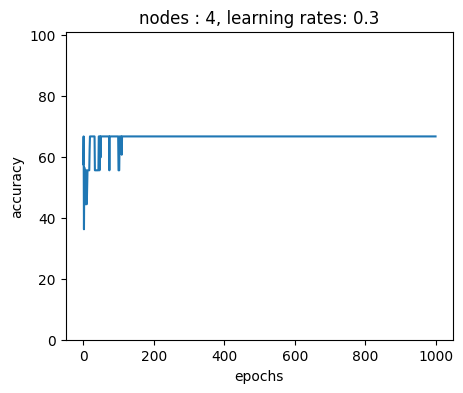

 23%|██▎       | 226/1000 [00:00<00:00, 1128.29it/s]

epochs: 0  | accuray: 64.444 %
epochs: 1  | accuray: 36.667 %
epochs: 2  | accuray: 66.667 %
epochs: 3  | accuray: 66.667 %
epochs: 4  | accuray: 66.667 %
epochs: 5  | accuray: 66.667 %
epochs: 6  | accuray: 66.667 %
epochs: 7  | accuray: 66.667 %
epochs: 8  | accuray: 66.667 %
epochs: 9  | accuray: 66.667 %
epochs: 10  | accuray: 66.667 %
epochs: 11  | accuray: 66.667 %
epochs: 12  | accuray: 66.667 %
epochs: 13  | accuray: 66.667 %
epochs: 14  | accuray: 66.667 %
epochs: 15  | accuray: 66.667 %
epochs: 16  | accuray: 66.667 %
epochs: 17  | accuray: 66.667 %
epochs: 18  | accuray: 66.667 %
epochs: 19  | accuray: 66.667 %
epochs: 20  | accuray: 66.667 %
epochs: 21  | accuray: 66.667 %
epochs: 22  | accuray: 66.667 %
epochs: 23  | accuray: 66.667 %
epochs: 24  | accuray: 66.667 %
epochs: 25  | accuray: 66.667 %
epochs: 26  | accuray: 66.667 %
epochs: 27  | accuray: 66.667 %
epochs: 28  | accuray: 66.667 %
epochs: 29  | accuray: 66.667 %
epochs: 30  | accuray: 66.667 %
epochs: 31  | accu

 34%|███▍      | 340/1000 [00:00<00:00, 1131.47it/s]

epochs: 226  | accuray: 66.667 %
epochs: 227  | accuray: 66.667 %
epochs: 228  | accuray: 66.667 %
epochs: 229  | accuray: 66.667 %
epochs: 230  | accuray: 66.667 %
epochs: 231  | accuray: 66.667 %
epochs: 232  | accuray: 66.667 %
epochs: 233  | accuray: 66.667 %
epochs: 234  | accuray: 66.667 %
epochs: 235  | accuray: 66.667 %
epochs: 236  | accuray: 66.667 %
epochs: 237  | accuray: 66.667 %
epochs: 238  | accuray: 66.667 %
epochs: 239  | accuray: 66.667 %
epochs: 240  | accuray: 66.667 %
epochs: 241  | accuray: 66.667 %
epochs: 242  | accuray: 66.667 %
epochs: 243  | accuray: 66.667 %
epochs: 244  | accuray: 66.667 %
epochs: 245  | accuray: 66.667 %
epochs: 246  | accuray: 66.667 %
epochs: 247  | accuray: 66.667 %
epochs: 248  | accuray: 66.667 %
epochs: 249  | accuray: 66.667 %
epochs: 250  | accuray: 66.667 %
epochs: 251  | accuray: 66.667 %
epochs: 252  | accuray: 66.667 %
epochs: 253  | accuray: 66.667 %
epochs: 254  | accuray: 66.667 %
epochs: 255  | accuray: 66.667 %
epochs: 25

 57%|█████▋    | 567/1000 [00:00<00:00, 1092.12it/s]

epochs: 453  | accuray: 66.667 %
epochs: 454  | accuray: 66.667 %
epochs: 455  | accuray: 66.667 %
epochs: 456  | accuray: 66.667 %
epochs: 457  | accuray: 66.667 %
epochs: 458  | accuray: 66.667 %
epochs: 459  | accuray: 66.667 %
epochs: 460  | accuray: 66.667 %
epochs: 461  | accuray: 66.667 %
epochs: 462  | accuray: 66.667 %
epochs: 463  | accuray: 66.667 %
epochs: 464  | accuray: 66.667 %
epochs: 465  | accuray: 66.667 %
epochs: 466  | accuray: 66.667 %
epochs: 467  | accuray: 66.667 %
epochs: 468  | accuray: 66.667 %
epochs: 469  | accuray: 66.667 %
epochs: 470  | accuray: 66.667 %
epochs: 471  | accuray: 66.667 %
epochs: 472  | accuray: 66.667 %
epochs: 473  | accuray: 66.667 %
epochs: 474  | accuray: 66.667 %
epochs: 475  | accuray: 66.667 %
epochs: 476  | accuray: 66.667 %
epochs: 477  | accuray: 66.667 %
epochs: 478  | accuray: 66.667 %
epochs: 479  | accuray: 66.667 %
epochs: 480  | accuray: 66.667 %
epochs: 481  | accuray: 66.667 %
epochs: 482  | accuray: 66.667 %
epochs: 48

 78%|███████▊  | 785/1000 [00:00<00:00, 993.41it/s] 

epochs: 677  | accuray: 66.667 %
epochs: 678  | accuray: 66.667 %
epochs: 679  | accuray: 66.667 %
epochs: 680  | accuray: 66.667 %
epochs: 681  | accuray: 66.667 %
epochs: 682  | accuray: 66.667 %
epochs: 683  | accuray: 66.667 %
epochs: 684  | accuray: 66.667 %
epochs: 685  | accuray: 66.667 %
epochs: 686  | accuray: 66.667 %
epochs: 687  | accuray: 66.667 %
epochs: 688  | accuray: 66.667 %
epochs: 689  | accuray: 66.667 %
epochs: 690  | accuray: 66.667 %
epochs: 691  | accuray: 66.667 %
epochs: 692  | accuray: 66.667 %
epochs: 693  | accuray: 66.667 %
epochs: 694  | accuray: 66.667 %
epochs: 695  | accuray: 66.667 %
epochs: 696  | accuray: 66.667 %
epochs: 697  | accuray: 66.667 %
epochs: 698  | accuray: 66.667 %
epochs: 699  | accuray: 66.667 %
epochs: 700  | accuray: 66.667 %
epochs: 701  | accuray: 66.667 %
epochs: 702  | accuray: 66.667 %
epochs: 703  | accuray: 66.667 %
epochs: 704  | accuray: 66.667 %
epochs: 705  | accuray: 66.667 %
epochs: 706  | accuray: 66.667 %
epochs: 70

100%|██████████| 1000/1000 [00:00<00:00, 1065.43it/s]

epochs: 874  | accuray: 66.667 %
epochs: 875  | accuray: 66.667 %
epochs: 876  | accuray: 66.667 %
epochs: 877  | accuray: 66.667 %
epochs: 878  | accuray: 66.667 %
epochs: 879  | accuray: 66.667 %
epochs: 880  | accuray: 66.667 %
epochs: 881  | accuray: 66.667 %
epochs: 882  | accuray: 66.667 %
epochs: 883  | accuray: 66.667 %
epochs: 884  | accuray: 66.667 %
epochs: 885  | accuray: 66.667 %
epochs: 886  | accuray: 66.667 %
epochs: 887  | accuray: 66.667 %
epochs: 888  | accuray: 66.667 %
epochs: 889  | accuray: 66.667 %
epochs: 890  | accuray: 66.667 %
epochs: 891  | accuray: 66.667 %
epochs: 892  | accuray: 66.667 %
epochs: 893  | accuray: 66.667 %
epochs: 894  | accuray: 66.667 %
epochs: 895  | accuray: 66.667 %
epochs: 896  | accuray: 66.667 %
epochs: 897  | accuray: 66.667 %
epochs: 898  | accuray: 66.667 %
epochs: 899  | accuray: 66.667 %
epochs: 900  | accuray: 66.667 %
epochs: 901  | accuray: 66.667 %
epochs: 902  | accuray: 66.667 %
epochs: 903  | accuray: 66.667 %
epochs: 90

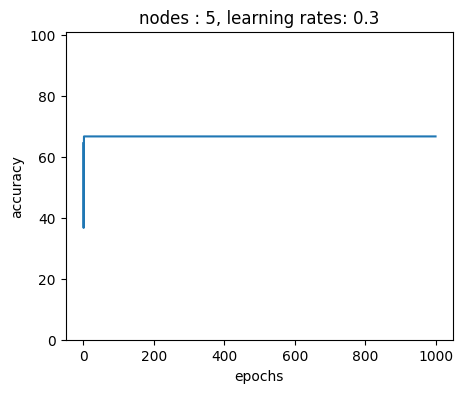

 23%|██▎       | 227/1000 [00:00<00:00, 1129.68it/s]

epochs: 0  | accuray: 49.556 %
epochs: 1  | accuray: 55.556 %
epochs: 2  | accuray: 55.556 %
epochs: 3  | accuray: 55.556 %
epochs: 4  | accuray: 66.667 %
epochs: 5  | accuray: 66.667 %
epochs: 6  | accuray: 55.556 %
epochs: 7  | accuray: 66.667 %
epochs: 8  | accuray: 55.556 %
epochs: 9  | accuray: 55.556 %
epochs: 10  | accuray: 55.556 %
epochs: 11  | accuray: 55.556 %
epochs: 12  | accuray: 55.556 %
epochs: 13  | accuray: 55.556 %
epochs: 14  | accuray: 55.556 %
epochs: 15  | accuray: 55.556 %
epochs: 16  | accuray: 55.556 %
epochs: 17  | accuray: 55.556 %
epochs: 18  | accuray: 55.556 %
epochs: 19  | accuray: 55.556 %
epochs: 20  | accuray: 55.556 %
epochs: 21  | accuray: 55.556 %
epochs: 22  | accuray: 55.556 %
epochs: 23  | accuray: 55.556 %
epochs: 24  | accuray: 55.556 %
epochs: 25  | accuray: 55.556 %
epochs: 26  | accuray: 55.556 %
epochs: 27  | accuray: 55.556 %
epochs: 28  | accuray: 55.556 %
epochs: 29  | accuray: 55.556 %
epochs: 30  | accuray: 55.556 %
epochs: 31  | accu

 34%|███▍      | 340/1000 [00:00<00:00, 1127.34it/s]

epochs: 227  | accuray: 44.444 %
epochs: 228  | accuray: 44.444 %
epochs: 229  | accuray: 44.444 %
epochs: 230  | accuray: 44.444 %
epochs: 231  | accuray: 44.444 %
epochs: 232  | accuray: 44.444 %
epochs: 233  | accuray: 44.444 %
epochs: 234  | accuray: 44.444 %
epochs: 235  | accuray: 44.444 %
epochs: 236  | accuray: 44.444 %
epochs: 237  | accuray: 44.444 %
epochs: 238  | accuray: 44.444 %
epochs: 239  | accuray: 44.444 %
epochs: 240  | accuray: 44.444 %
epochs: 241  | accuray: 44.444 %
epochs: 242  | accuray: 44.444 %
epochs: 243  | accuray: 44.444 %
epochs: 244  | accuray: 44.444 %
epochs: 245  | accuray: 44.444 %
epochs: 246  | accuray: 44.444 %
epochs: 247  | accuray: 44.444 %
epochs: 248  | accuray: 44.444 %
epochs: 249  | accuray: 44.444 %
epochs: 250  | accuray: 44.444 %
epochs: 251  | accuray: 44.444 %
epochs: 252  | accuray: 44.444 %
epochs: 253  | accuray: 44.444 %
epochs: 254  | accuray: 44.444 %
epochs: 255  | accuray: 44.444 %
epochs: 256  | accuray: 44.444 %
epochs: 25

 56%|█████▌    | 560/1000 [00:00<00:00, 1052.57it/s]

epochs: 430  | accuray: 44.444 %
epochs: 431  | accuray: 44.444 %
epochs: 432  | accuray: 44.444 %
epochs: 433  | accuray: 44.444 %
epochs: 434  | accuray: 44.444 %
epochs: 435  | accuray: 44.444 %
epochs: 436  | accuray: 44.444 %
epochs: 437  | accuray: 44.444 %
epochs: 438  | accuray: 44.444 %
epochs: 439  | accuray: 44.444 %
epochs: 440  | accuray: 44.444 %
epochs: 441  | accuray: 44.444 %
epochs: 442  | accuray: 44.444 %
epochs: 443  | accuray: 44.444 %
epochs: 444  | accuray: 44.444 %
epochs: 445  | accuray: 44.444 %
epochs: 446  | accuray: 44.444 %
epochs: 447  | accuray: 44.444 %
epochs: 448  | accuray: 44.444 %
epochs: 449  | accuray: 44.444 %
epochs: 450  | accuray: 44.444 %
epochs: 451  | accuray: 44.444 %
epochs: 452  | accuray: 44.444 %
epochs: 453  | accuray: 44.444 %
epochs: 454  | accuray: 44.444 %
epochs: 455  | accuray: 44.444 %
epochs: 456  | accuray: 44.444 %
epochs: 457  | accuray: 44.444 %
epochs: 458  | accuray: 44.444 %
epochs: 459  | accuray: 44.444 %
epochs: 46

 78%|███████▊  | 777/1000 [00:00<00:00, 1068.84it/s]

epochs: 640  | accuray: 55.556 %
epochs: 641  | accuray: 55.556 %
epochs: 642  | accuray: 55.556 %
epochs: 643  | accuray: 55.556 %
epochs: 644  | accuray: 55.556 %
epochs: 645  | accuray: 55.556 %
epochs: 646  | accuray: 55.556 %
epochs: 647  | accuray: 55.556 %
epochs: 648  | accuray: 55.556 %
epochs: 649  | accuray: 55.556 %
epochs: 650  | accuray: 55.556 %
epochs: 651  | accuray: 55.556 %
epochs: 652  | accuray: 55.556 %
epochs: 653  | accuray: 55.556 %
epochs: 654  | accuray: 55.556 %
epochs: 655  | accuray: 55.556 %
epochs: 656  | accuray: 55.556 %
epochs: 657  | accuray: 55.556 %
epochs: 658  | accuray: 55.556 %
epochs: 659  | accuray: 55.556 %
epochs: 660  | accuray: 55.556 %
epochs: 661  | accuray: 55.556 %
epochs: 662  | accuray: 55.556 %
epochs: 663  | accuray: 55.556 %
epochs: 664  | accuray: 55.556 %
epochs: 665  | accuray: 55.556 %
epochs: 666  | accuray: 55.556 %
epochs: 667  | accuray: 55.556 %
epochs: 668  | accuray: 55.556 %
epochs: 669  | accuray: 55.556 %
epochs: 67

100%|██████████| 1000/1000 [00:00<00:00, 1019.24it/s]

epochs: 843  | accuray: 55.556 %
epochs: 844  | accuray: 55.556 %
epochs: 845  | accuray: 55.556 %
epochs: 846  | accuray: 55.556 %
epochs: 847  | accuray: 55.556 %
epochs: 848  | accuray: 55.556 %
epochs: 849  | accuray: 55.556 %
epochs: 850  | accuray: 55.556 %
epochs: 851  | accuray: 55.556 %
epochs: 852  | accuray: 55.556 %
epochs: 853  | accuray: 55.556 %
epochs: 854  | accuray: 55.556 %
epochs: 855  | accuray: 55.556 %
epochs: 856  | accuray: 55.556 %
epochs: 857  | accuray: 55.556 %
epochs: 858  | accuray: 55.556 %
epochs: 859  | accuray: 55.556 %
epochs: 860  | accuray: 55.556 %
epochs: 861  | accuray: 55.556 %
epochs: 862  | accuray: 55.556 %
epochs: 863  | accuray: 55.556 %
epochs: 864  | accuray: 55.556 %
epochs: 865  | accuray: 55.556 %
epochs: 866  | accuray: 55.556 %
epochs: 867  | accuray: 55.556 %
epochs: 868  | accuray: 55.556 %
epochs: 869  | accuray: 55.556 %
epochs: 870  | accuray: 55.556 %
epochs: 871  | accuray: 55.556 %
epochs: 872  | accuray: 55.556 %
epochs: 87

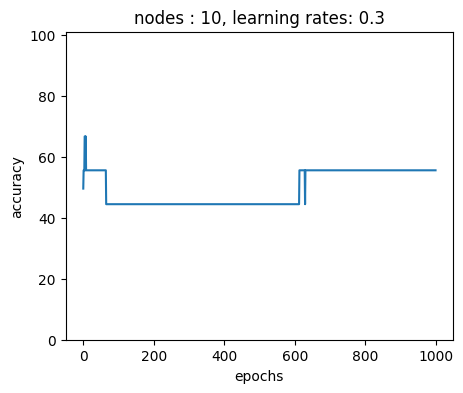

In [31]:
BPN_implement(1000,0.3,1)
BPN_implement(1000,0.3,2)
BPN_implement(1000,0.3,3)
BPN_implement(1000,0.3,4)
BPN_implement(1000,0.3,5)
BPN_implement(1000,0.3,10)